In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
data = pd.read_csv("/content/final_dataset_with_added_columns.csv")

In [ ]:
data["Occupation"].unique()


array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Salesperson', 'Manager', 'Student'], dtype=object)

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files

# Load the dataset
file_path = '/content/final_dataset_with_added_columns.csv'  # Update this with your dataset path
data = pd.read_csv(file_path)

# Define step count ranges for each occupation
occupation_step_ranges = {
    "Salesperson": (10000, 15000),
    "Doctor": (4000, 6000),
    "Engineer": (8000, 10000),
    "Nurse": (9000, 12000),
    "Teacher": (7000, 9000),
    "Driver": (3000, 5000),
    "Student": (6000, 8000)
}

# Assign step counts within the range for each occupation
def assign_steps(occupation):
    if occupation in occupation_step_ranges:
        # Ensure that the step count falls within the defined range
        return np.random.randint(occupation_step_ranges[occupation][0], occupation_step_ranges[occupation][1])
    return np.random.randint(5000, 8000)  # Default for unspecified occupations

data['Daily Steps'] = data['Occupation'].apply(assign_steps)

# Recalculate distances based on Daily Steps
def calculate_distances(steps):
    # Assume 80% of steps are walking, 20% are running
    walking_steps = int(steps * 0.8)
    running_steps = steps - walking_steps
    # Convert steps to distances assuming average step length: 0.000762 km per step
    walking_distance = int(walking_steps * 0.000762 * 1000)  # in meters
    running_distance = int(running_steps * 0.000762 * 1000)  # in meters
    return walking_distance, running_distance

data[['Walking Distance', 'Running Distance']] = data['Daily Steps'].apply(
    lambda steps: pd.Series(calculate_distances(steps))
)


# Add random morning and evening walking distances
def assign_walk_segments(walking_distance):
    morning_walk = np.random.randint(int(0.1 * walking_distance), int(0.2 * walking_distance))
    evening_walk = np.random.randint(int(0.1 * walking_distance), int(0.2 * walking_distance))
    return morning_walk, evening_walk

data[['Morning Walking Distance', 'Evening Walking Distance']] = data['Walking Distance'].apply(
    lambda distance: pd.Series(assign_walk_segments(distance))
)
# Ensure walking distance includes morning and evening distances
data['Walking Distance'] += (data['Morning Walking Distance'] + data['Evening Walking Distance'])

# Recalculate Environmental Light Exposure based on exercise distances
data['Environmental Light Exposure'] = (data['Morning Walking Distance'] + data['Evening Walking Distance']) * 2

# Adjust caloric expenditure based on activity
data['Caloric Expenditure'] = ((data['Walking Distance'] + data['Running Distance']) * 0.05).astype(int)

# Randomize blood pressure and heart rate
def randomize_bp():
    return np.random.randint(90, 140)  # Random BP between 90 and 140

def randomize_hr(bp):
    if bp > 130:
        return np.random.randint(100, 120)  # High BP, higher HR
    elif bp < 90:
        return np.random.randint(60, 80)  # Low BP, lower HR
    return np.random.randint(70, 100)  # Normal range

data['Blood Pressure'] = data['Occupation'].apply(lambda _: randomize_bp())
data['Heart Rate'] = data['Blood Pressure'].apply(randomize_hr)

# Determine stress level based on health conditions
def determine_stress(bp, hr):
    if bp > 130 and hr > 100:
        return "High"
    elif bp < 90:
        return "Low"
    return "Moderate"

data['Stress Level'] = data.apply(lambda row: determine_stress(row['Blood Pressure'], row['Heart Rate']), axis=1)

# Assign sleep disorder based on health and occupation
def assign_sleep_disorder(occupation, bp, stress):
    if occupation in ['Doctor', 'Engineer'] and stress == "High":
        return "Insomnia"
    elif bp > 130:
        return "Sleep Apnea"
    return None

data['Sleep Disorder'] = data.apply(lambda row: assign_sleep_disorder(row['Occupation'], row['Blood Pressure'], row['Stress Level']), axis=1)

# Adjust sleep duration based on step count, physical activity, stress, disorder, and health conditions
def adjust_sleep_duration(steps, activity_level, stress, disorder, bp, hr):
    # Base sleep duration from step count
    if steps >= 12000:
        base_sleep = 8.0  # Ideal sleep duration
    elif steps >= 8000:
        base_sleep = 7.0
    else:
        base_sleep = 6.0  # Lower sleep due to inactivity

    # Adjustments based on physical activity level
    if activity_level == "High":
        base_sleep += 1.0
    elif activity_level == "Low":
        base_sleep -= 1.0

    # Stress impact on sleep
    if stress == "High":
        base_sleep -= 2.0
    elif stress == "Low":
        base_sleep += 1.0

    # Sleep disorder impact
    if disorder == "Insomnia":
        base_sleep = max(4.0, base_sleep - 2.0)  # Severe reduction
    elif disorder == "Sleep Apnea":
        base_sleep = max(5.0, base_sleep - 1.0)  # Moderate reduction

    # Health condition impact
    if bp > 130 or hr > 100:  # High BP/HR reduces sleep
        base_sleep -= 1.0
    elif bp < 90 or hr < 60:  # Low BP/HR increases sleep
        base_sleep += 1.0

    # Add a small random variation to introduce decimals
    base_sleep += np.random.uniform(-0.5, 0.5)

    # Ensure sleep duration is within realistic bounds
    return round(max(4.0, min(10.0, base_sleep)), 1)

# Calculate Sleep Duration with the updated logic
data['Sleep Duration'] = data.apply(
    lambda row: adjust_sleep_duration(
        row['Daily Steps'],
        row['Physical Activity Level'],
        row['Stress Level'],
        row['Sleep Disorder'],
        row['Blood Pressure'],
        row['Heart Rate']
    ),
    axis=1
)

# Determine physical activity level based on step count
def determine_activity_level(steps):
    if steps >= 10000:
        return "High"
    elif steps >= 7000:
        return "Moderate"
    return "Low"

data['Physical Activity Level'] = data['Daily Steps'].apply(determine_activity_level)

# Save the modified dataset
output_path = 'modified_dataset.csv'  # File saved in the current directory
data.to_csv(output_path, index=False)

# Download the file
files.download(output_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
data.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder', 'Walking Distance', 'Running Distance',
       'Environmental Light Exposure', 'Caloric Expenditure'],
      dtype='object')

In [ ]:
data.shape

(610, 17)

In [ ]:
data.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Walking Distance,Running Distance,Environmental Light Exposure,Caloric Expenditure
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN,1958.548383,2241.451617,3176.472736,271.937308
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,6459.200780,3540.799220,3585.268477,515.892646
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,5039.355774,4960.644226,3607.916861,587.111380
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,1523.531241,1476.468759,1583.588458,181.159323
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,1539.207833,1460.792167,951.204405,174.051652
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia,1312.698257,1687.301743,1373.158466,189.596672
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia,2214.733139,1285.266861,1830.127881,189.564622
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN,5219.594234,2780.405766,5544.429883,438.214587
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN,3249.290851,4750.709149,3083.226736,512.117725
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN,3456.213123,4543.786877,2602.617502,496.965519


In [ ]:
data.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Walking Distance,Running Distance,Environmental Light Exposure,Caloric Expenditure
count,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000
mean,305.113115,38.055738,7.201803,7.191803,58.040984,5.457377,70.849180,6919.224590,3812.222381,3107.002209,3759.536114,403.424258
std,175.825116,10.218154,0.801198,1.210626,19.431323,1.640713,4.681677,1605.285487,1088.401295,927.503807,1369.288386,98.169316
min,1.000000,13.000000,5.800000,4.000000,27.000000,3.000000,65.000000,3000.000000,1312.698257,1262.920978,951.204405,174.051652
25%,153.250000,32.000000,6.500000,6.000000,45.000000,4.000000,68.000000,5712.000000,3073.878425,2411.716917,2744.336003,319.588591
50%,305.500000,38.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000,3626.499155,2967.085768,3590.178436,411.337851
75%,456.750000,44.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000,4560.683739,3759.917062,4597.225781,469.203529
max,609.000000,59.000000,9.000000,9.000000,90.000000,8.000000,90.000000,11960.000000,8031.097199,5930.872921,8327.747384,664.291740


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Person ID                     610 non-null    int64  
 1   Gender                        610 non-null    object 
 2   Age                           610 non-null    int64  
 3   Occupation                    610 non-null    object 
 4   Sleep Duration                610 non-null    float64
 5   Quality of Sleep              610 non-null    int64  
 6   Physical Activity Level       610 non-null    int64  
 7   Stress Level                  610 non-null    int64  
 8   BMI Category                  610 non-null    object 
 9   Blood Pressure                610 non-null    object 
 10  Heart Rate                    610 non-null    int64  
 11  Daily Steps                   610 non-null    int64  
 12  Sleep Disorder                200 non-null    object 
 13  Walki

# Descriptive Analysis

In [ ]:
# Summary statistics for numerical variables
numerical_summary = data.describe()
# Summary statistics for categorical variables
categorical_summary = data.describe(include='object')
# Select only numeric columns for correlation analysis
numeric_df = data.select_dtypes(include='number')
# Calculate correlation matrix for numeric variables
correlation_matrix = numeric_df.corr()# Print the results
print("Summary statistics for numerical variables:")
print(numerical_summary)
print("\nSummary statistics for categorical variables:")
print(categorical_summary)
print("\nCorrelation matrix for numerical variables:")
print(correlation_matrix)

Summary statistics for numerical variables:
        Person ID         Age  Sleep Duration  Quality of Sleep  \
count  610.000000  610.000000      610.000000        610.000000   
mean   305.113115   38.055738        7.201803          7.191803   
std    175.825116   10.218154        0.801198          1.210626   
min      1.000000   13.000000        5.800000          4.000000   
25%    153.250000   32.000000        6.500000          6.000000   
50%    305.500000   38.000000        7.200000          7.000000   
75%    456.750000   44.000000        7.800000          8.000000   
max    609.000000   59.000000        9.000000          9.000000   

       Physical Activity Level  Stress Level  Heart Rate   Daily Steps  \
count               610.000000    610.000000  610.000000    610.000000   
mean                 58.040984      5.457377   70.849180   6919.224590   
std                  19.431323      1.640713    4.681677   1605.285487   
min                  27.000000      3.000000   65.000000

1. Stress and Its Role in Sleep Duration and Quality:
Correlation Values:
Stress level and sleep duration: -0.686 (strong negative correlation)
Stress level and sleep quality: -0.787 (very strong negative correlation)
From these correlations:

Higher stress levels are strongly linked to shorter sleep duration and poorer sleep quality. This means that as stress increases, people tend to sleep less and experience worse-quality sleep.

In your dataset:

The mean stress level is 5.45, and the standard deviation is 1.64. Some people have stress levels as high as 8 (on a scale of 1 to 10), which corresponds to the minimum sleep quality of 4.
Individuals with higher stress levels (closer to 8) tend to have shorter sleep durations (around 5.8 hours) and poorer sleep quality (closer to 4-5 out of 10).
This shows that stress management could be key to improving sleep outcomes. Reducing stress from 8 to around 4 might help increase sleep duration (closer to the mean of 7.2 hours) and improve sleep quality to 7+.

2. Physical Activity and Sleep:
Correlation Values:
Physical activity level and sleep duration: 0.294 (moderate positive correlation)
Physical activity level and sleep quality: 0.317 (moderate positive correlation)
From these correlations:

Higher physical activity levels are linked to longer sleep duration and better sleep quality. People who engage in more physical activity tend to sleep more and experience better-quality sleep.

In your dataset:

The mean physical activity level is 58, and the mean daily steps is 6919. People who have higher activity levels (closer to the maximum of 90) also tend to have better sleep quality, closer to 8-9 on the scale, and sleep duration around 7.8-9 hours (as observed in the upper quartile).
Therefore, encouraging individuals to increase their daily steps and overall physical activity could push their sleep duration closer to the recommended 7-9 hours and improve sleep quality.

3. Heart Rate as a Health Marker for Sleep Quality:
Correlation Values:
Heart rate and sleep quality: -0.556 (moderate negative correlation)
From this correlation:

Higher heart rates are associated with lower sleep quality, which could indicate higher stress or underlying health issues that negatively impact sleep.

In your dataset:

The mean heart rate is 70.85 bpm, with a range between 65 and 90 bpm. People with higher heart rates (closer to 90 bpm) tend to report lower sleep quality (closer to 5 or 6 out of 10), whereas those with lower heart rates (closer to 65 bpm) report better sleep quality (closer to 8-9).
This suggests that monitoring heart rate trends and addressing underlying health or stress factors could improve overall sleep quality.

4. Age and Sleep Quality:
Correlation Values:
Age and sleep quality: 0.455 (moderate positive correlation)
Age and sleep duration: -0.021 (weak negative correlation)
From these correlations:

Older individuals tend to report better sleep quality, but age does not have a strong link to sleep duration.

In your dataset:

The mean age is 38, with a range from 13 to 59 years. People in the older age group (closer to 59) tend to report better sleep quality (closer to 8-9), while younger individuals (around 13-20 years) may report lower sleep quality, closer to 5-6.
Despite the weak correlation between age and sleep duration, the trend is that older individuals sleep better, even if they don’t sleep significantly longer.

Summarized Insights with Actual Values:
People with higher stress levels (mean stress = 5.45, max = 8) tend to have shorter sleep durations (closer to 5.8 hours) and poorer sleep quality (closer to 4-5).

Individuals who are more physically active (activity level mean = 58, max = 90) tend to enjoy better sleep quality (closer to 8-9) and sleep longer (around 7.8-9 hours).

Those with higher heart rates (closer to 90 bpm) experience worse sleep quality (around 5-6), while those with lower heart rates (closer to 65 bpm) report better sleep quality (8-9).

Older individuals (closer to 59 years) tend to report better sleep quality (8-9) but do not necessarily sleep longer than younger individuals.

These values help validate the importance of physical activity, stress management, and heart rate monitoring in improving sleep duration and quality, supporting your future model implementations.

# Missing Data Handling

In [ ]:
data.isna().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


In [ ]:
data['Sleep Disorder'].fillna('None', inplace=True)

In [ ]:
data.isna().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


# Visual Representation

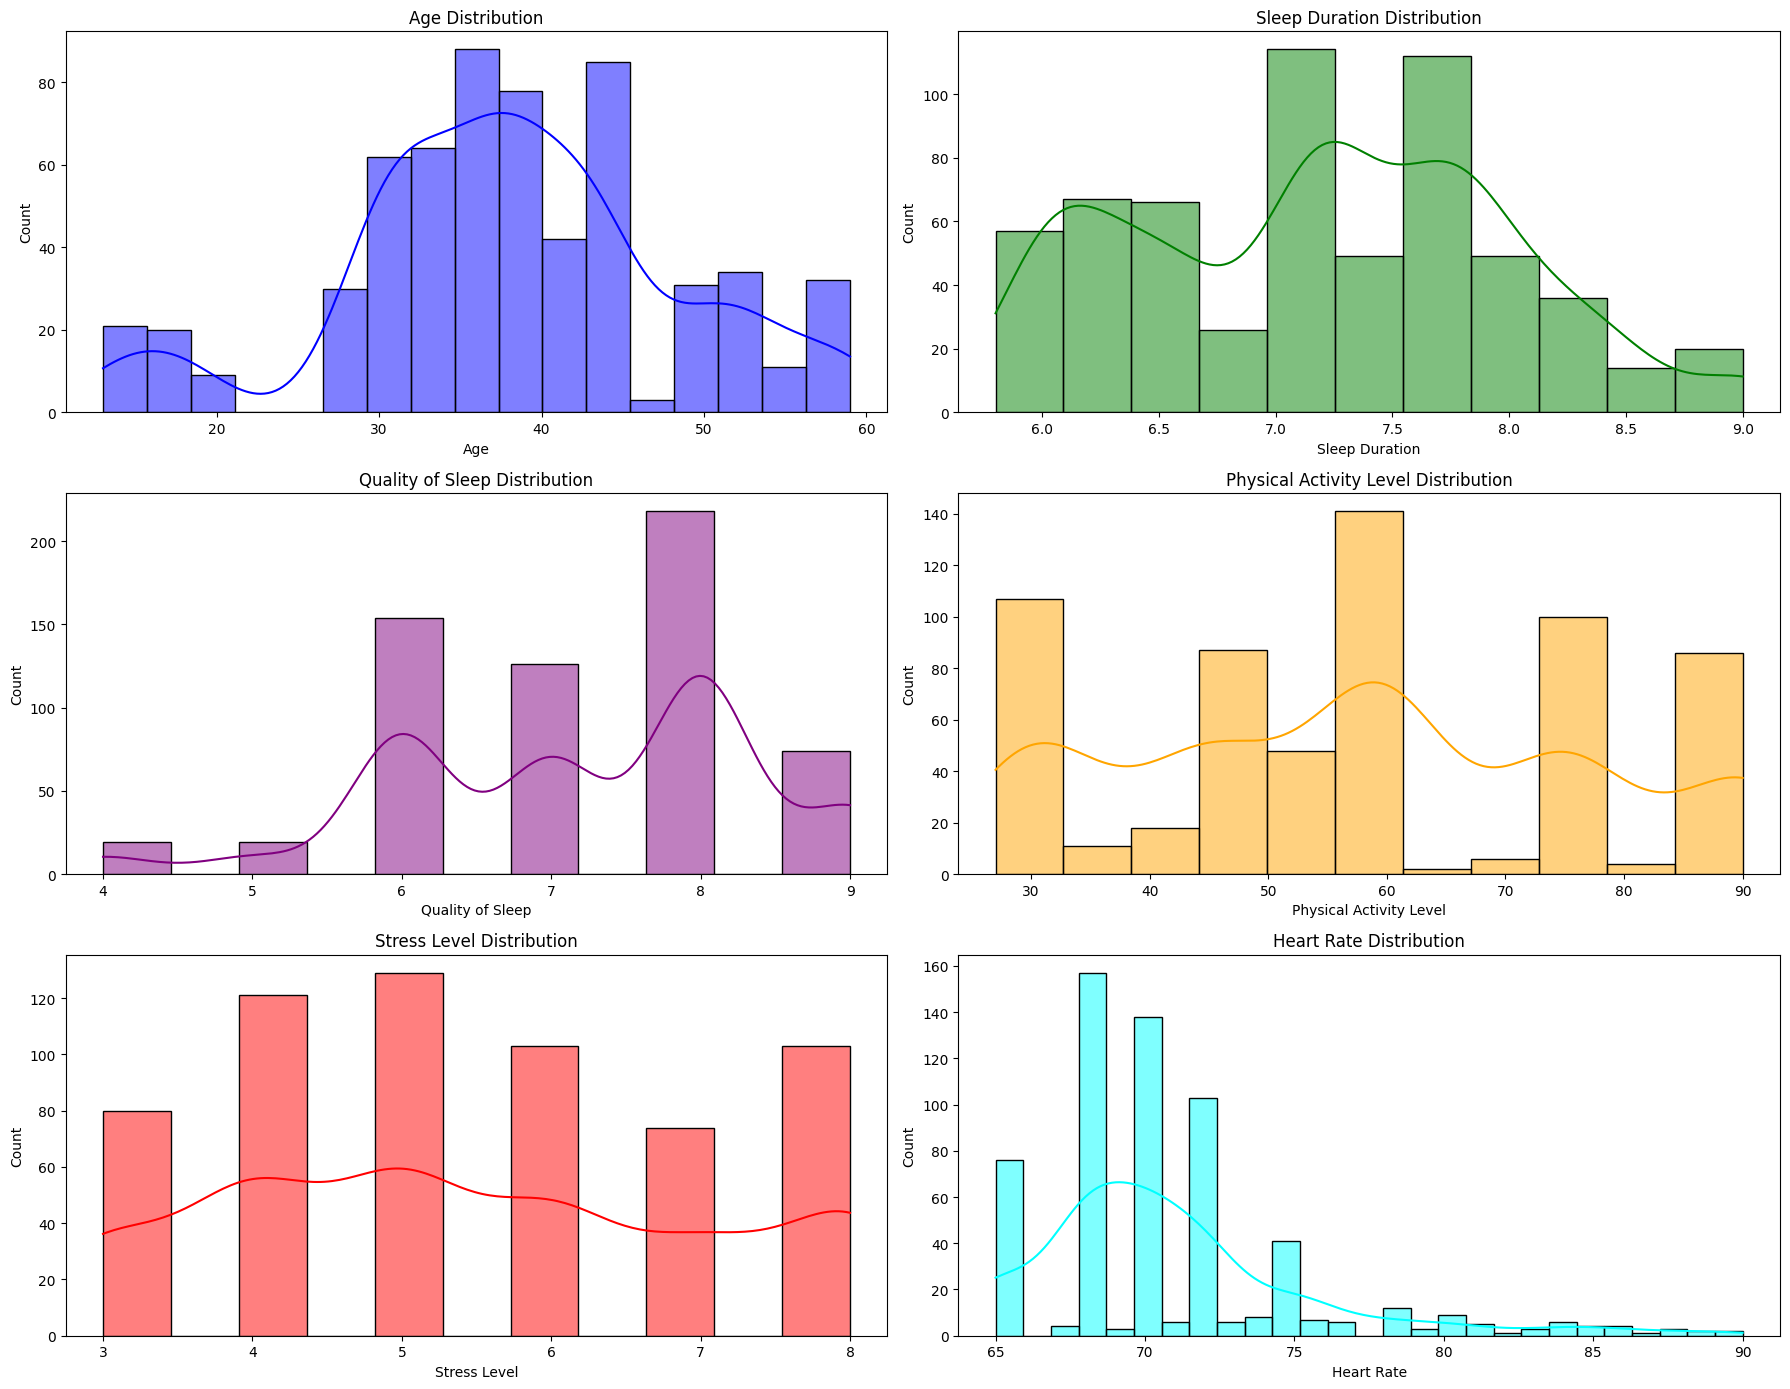

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(18, 14))

# Creating subplots for each numerical attribute
plt.subplot(3, 2, 1)
sns.histplot(data['Age'], kde=True, color='blue').set_title('Age Distribution')

plt.subplot(3, 2, 2)
sns.histplot(data['Sleep Duration'], kde=True, color='green').set_title('Sleep Duration Distribution')

plt.subplot(3, 2, 3)
sns.histplot(data['Quality of Sleep'], kde=True, color='purple').set_title('Quality of Sleep Distribution')

plt.subplot(3, 2, 4)
sns.histplot(data['Physical Activity Level'], kde=True, color='orange').set_title('Physical Activity Level Distribution')

plt.subplot(3, 2, 5)
sns.histplot(data['Stress Level'], kde=True, color='red').set_title('Stress Level Distribution')

plt.subplot(3, 2, 6)
sns.histplot(data['Heart Rate'], kde=True, color='cyan').set_title('Heart Rate Distribution')

# Adjust layout
plt.tight_layout()

# Show the plots for the numerical attributes
plt.show()


# Univariate Analysis

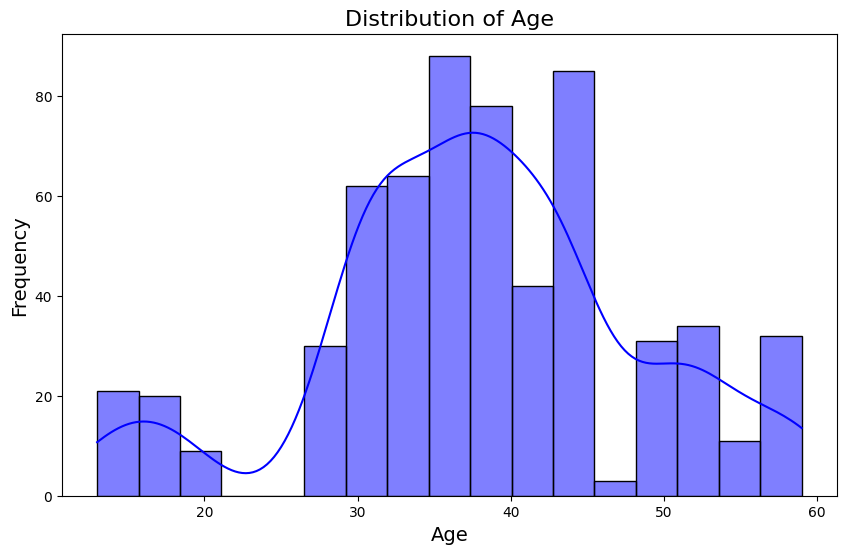

Summary Statistics for Age:

count    610.000000
mean      38.055738
std       10.218154
min       13.000000
25%       32.000000
50%       38.000000
75%       44.000000
max       59.000000
Name: Age, dtype: float64

---------------------------------



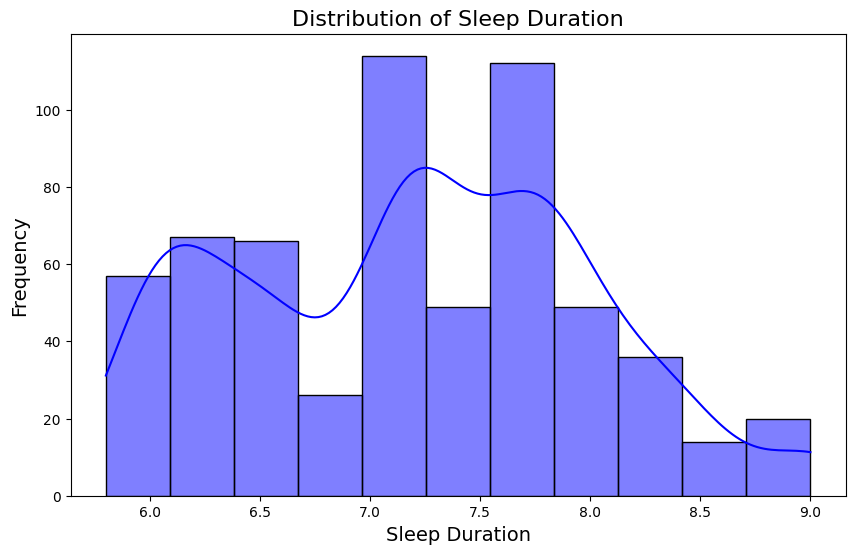

Summary Statistics for Sleep Duration:

count    610.000000
mean       7.201803
std        0.801198
min        5.800000
25%        6.500000
50%        7.200000
75%        7.800000
max        9.000000
Name: Sleep Duration, dtype: float64

---------------------------------



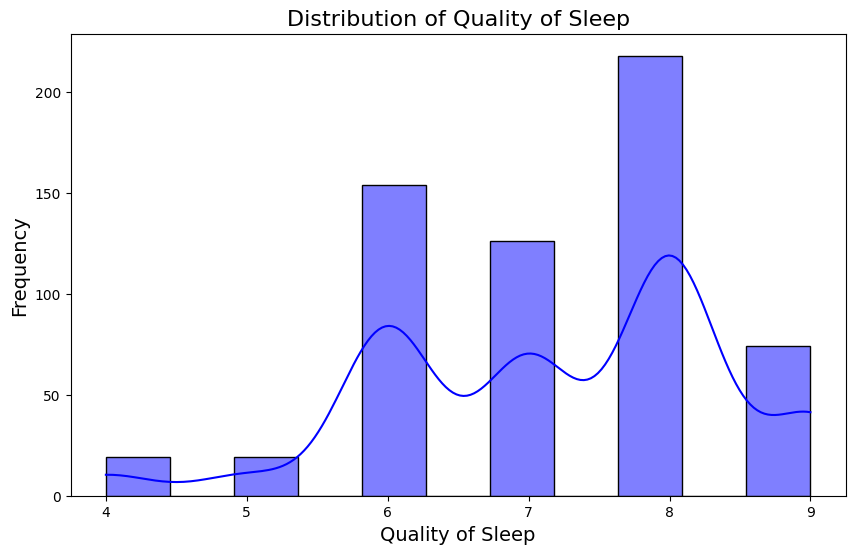

Summary Statistics for Quality of Sleep:

count    610.000000
mean       7.191803
std        1.210626
min        4.000000
25%        6.000000
50%        7.000000
75%        8.000000
max        9.000000
Name: Quality of Sleep, dtype: float64

---------------------------------



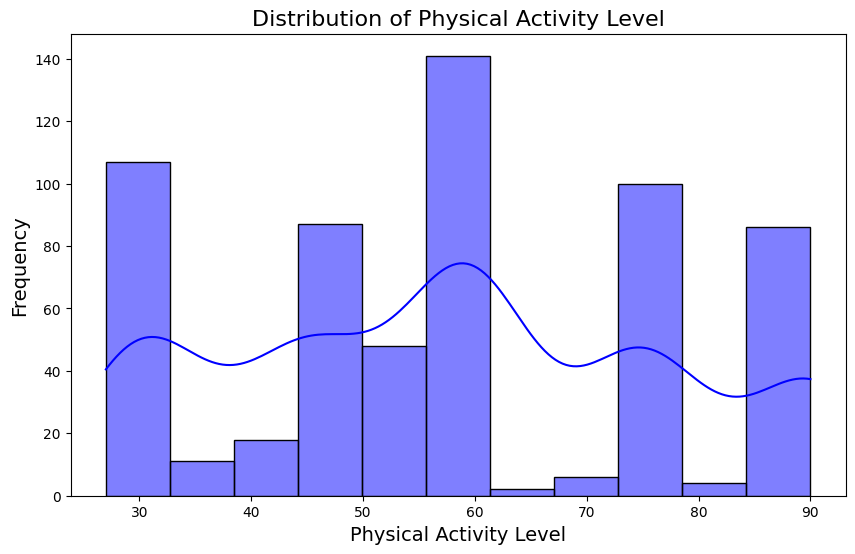

Summary Statistics for Physical Activity Level:

count    610.000000
mean      58.040984
std       19.431323
min       27.000000
25%       45.000000
50%       60.000000
75%       75.000000
max       90.000000
Name: Physical Activity Level, dtype: float64

---------------------------------



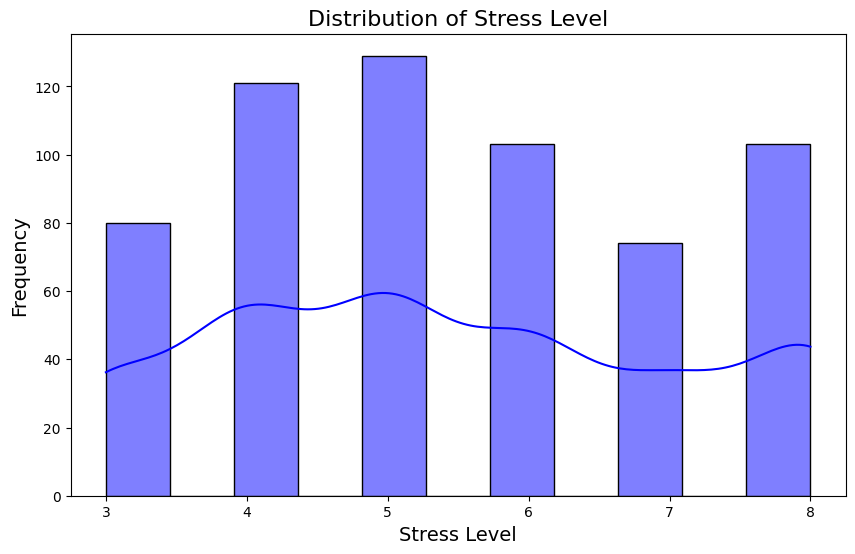

Summary Statistics for Stress Level:

count    610.000000
mean       5.457377
std        1.640713
min        3.000000
25%        4.000000
50%        5.000000
75%        7.000000
max        8.000000
Name: Stress Level, dtype: float64

---------------------------------



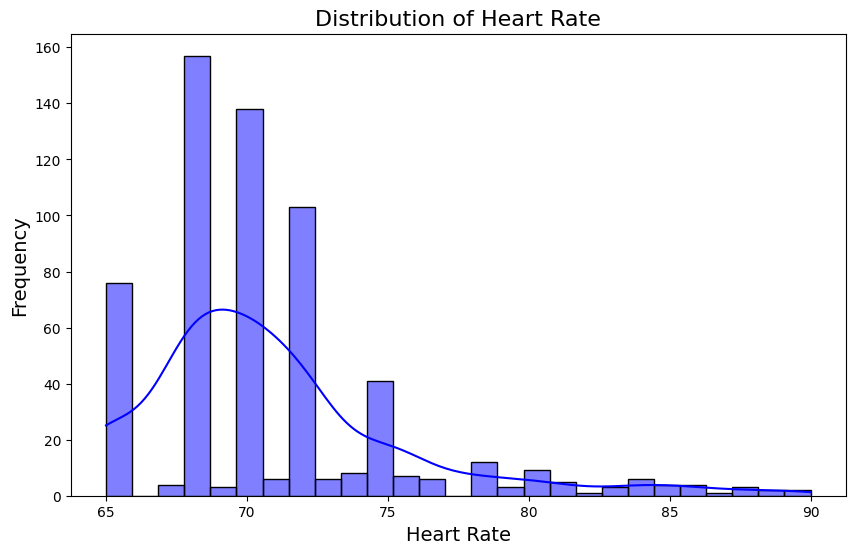

Summary Statistics for Heart Rate:

count    610.000000
mean      70.849180
std        4.681677
min       65.000000
25%       68.000000
50%       70.000000
75%       72.000000
max       90.000000
Name: Heart Rate, dtype: float64

---------------------------------



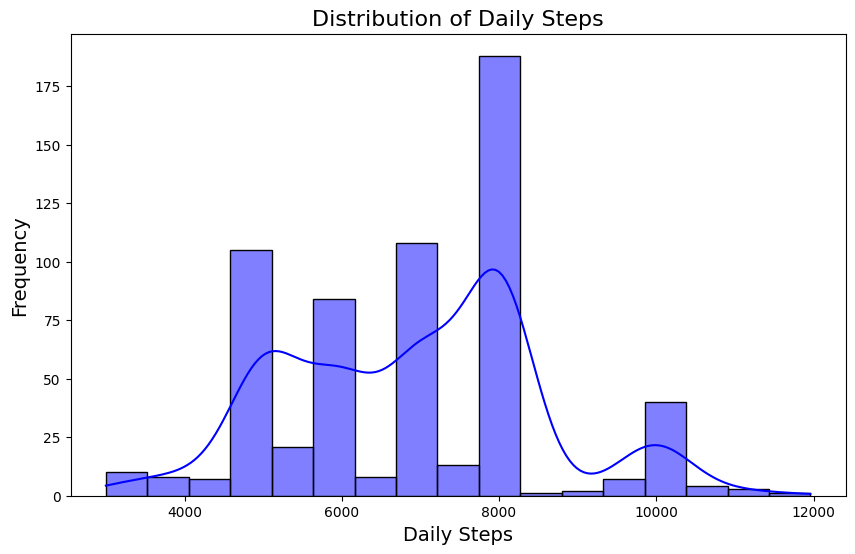

Summary Statistics for Daily Steps:

count      610.000000
mean      6919.224590
std       1605.285487
min       3000.000000
25%       5712.000000
50%       7000.000000
75%       8000.000000
max      11960.000000
Name: Daily Steps, dtype: float64

---------------------------------



<ipython-input-14-d4c8f1ddec36>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='viridis')


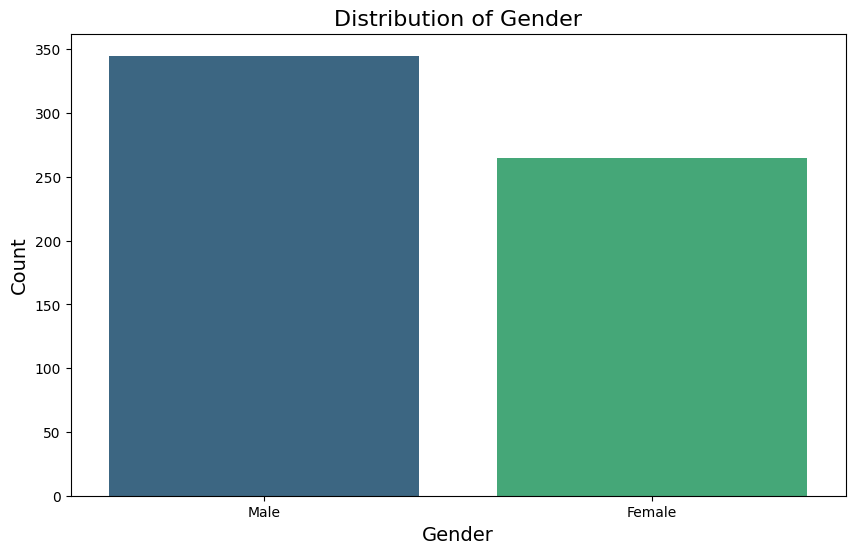

Value Counts for Gender:

Gender
Male      345
Female    265
Name: count, dtype: int64

---------------------------------



<ipython-input-14-d4c8f1ddec36>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='viridis')


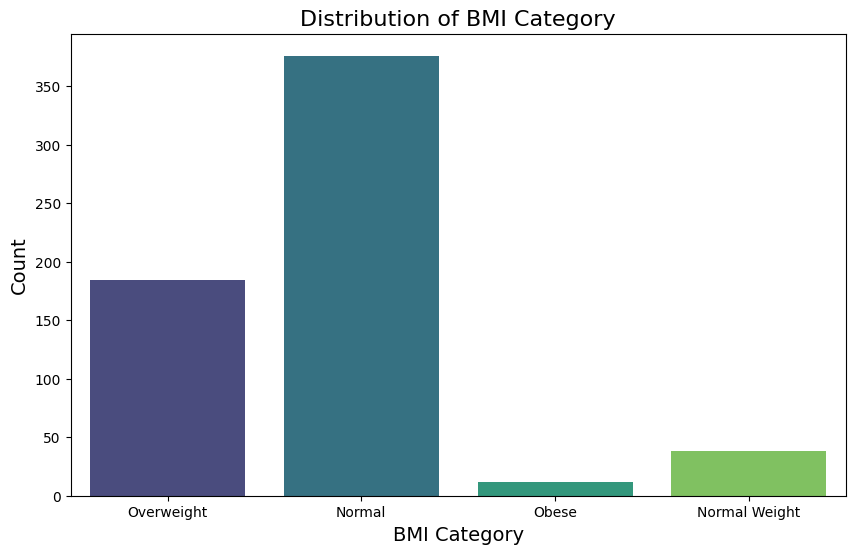

Value Counts for BMI Category:

BMI Category
Normal           376
Overweight       184
Normal Weight     38
Obese             12
Name: count, dtype: int64

---------------------------------



<ipython-input-14-d4c8f1ddec36>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='viridis')


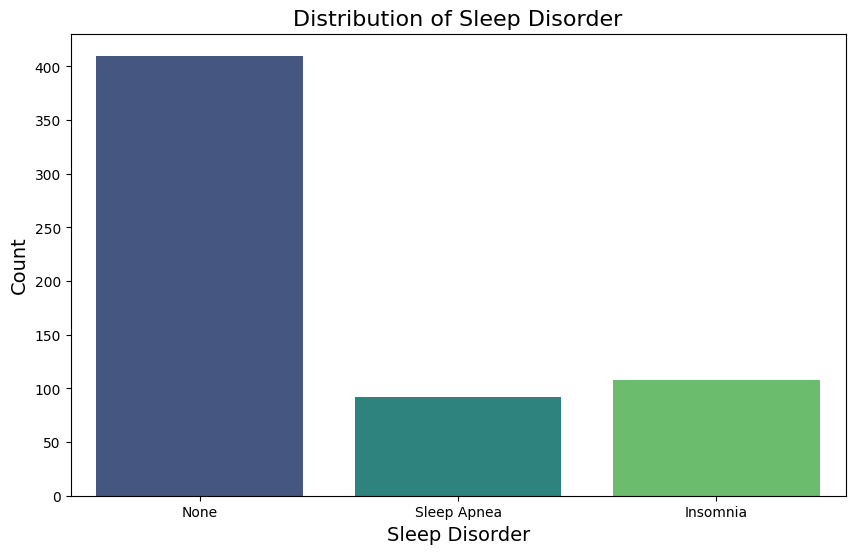

Value Counts for Sleep Disorder:

Sleep Disorder
None           410
Insomnia       108
Sleep Apnea     92
Name: count, dtype: int64

---------------------------------



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Univariate Analysis for Numerical Attributes
def univariate_analysis_numerical(data, col):
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col], kde=True, color='blue')
    plt.title(f'Distribution of {col}', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.show()
    print(f"Summary Statistics for {col}:\n")
    print(data[col].describe())
    print("\n---------------------------------\n")

# Univariate Analysis for Categorical Attributes
def univariate_analysis_categorical(data, col):
    plt.figure(figsize=(10, 6))
    sns.countplot(x=data[col], palette='viridis')
    plt.title(f'Distribution of {col}', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.show()
    print(f"Value Counts for {col}:\n")
    print(data[col].value_counts())
    print("\n---------------------------------\n")

# Perform Univariate Analysis for Numerical Attributes
numerical_cols = ['Age', 'Sleep Duration', 'Quality of Sleep',
                  'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']

for col in numerical_cols:
    univariate_analysis_numerical(data, col)

# Perform Univariate Analysis for Categorical Attributes
categorical_cols = ['Gender', 'BMI Category', 'Sleep Disorder']

for col in categorical_cols:
    univariate_analysis_categorical(data, col)


# Bivariate Analysis

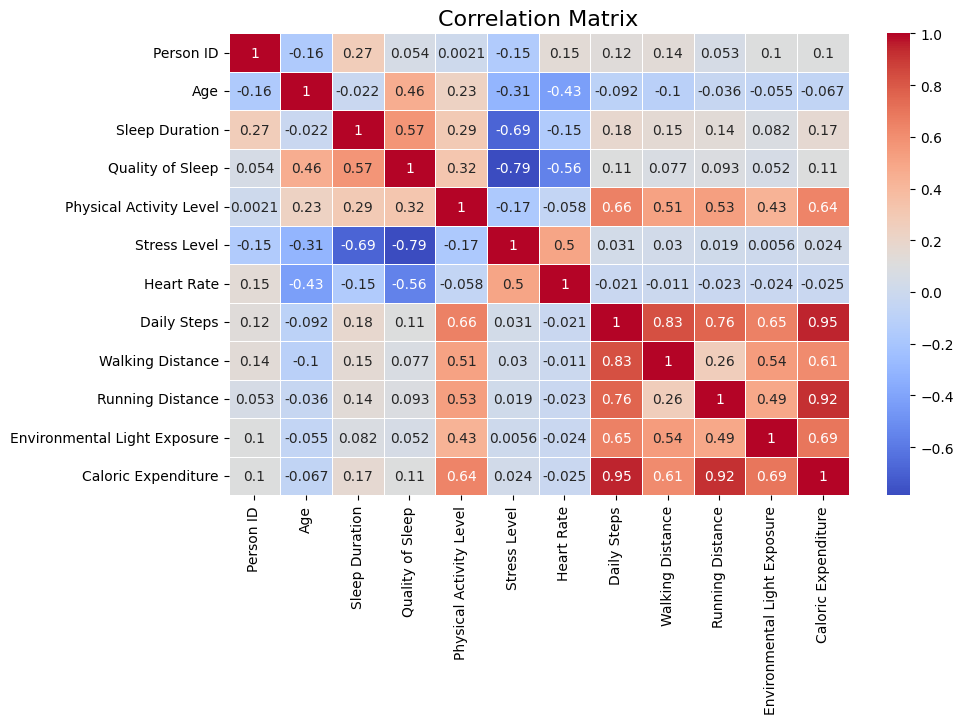

In [ ]:
# Correlation Matrix for numerical variables
plt.figure(figsize=(10, 6))
# Select only numerical columns for correlation calculation
numerical_data = data.select_dtypes(include=['number'])
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix", fontsize=16)
plt.show()

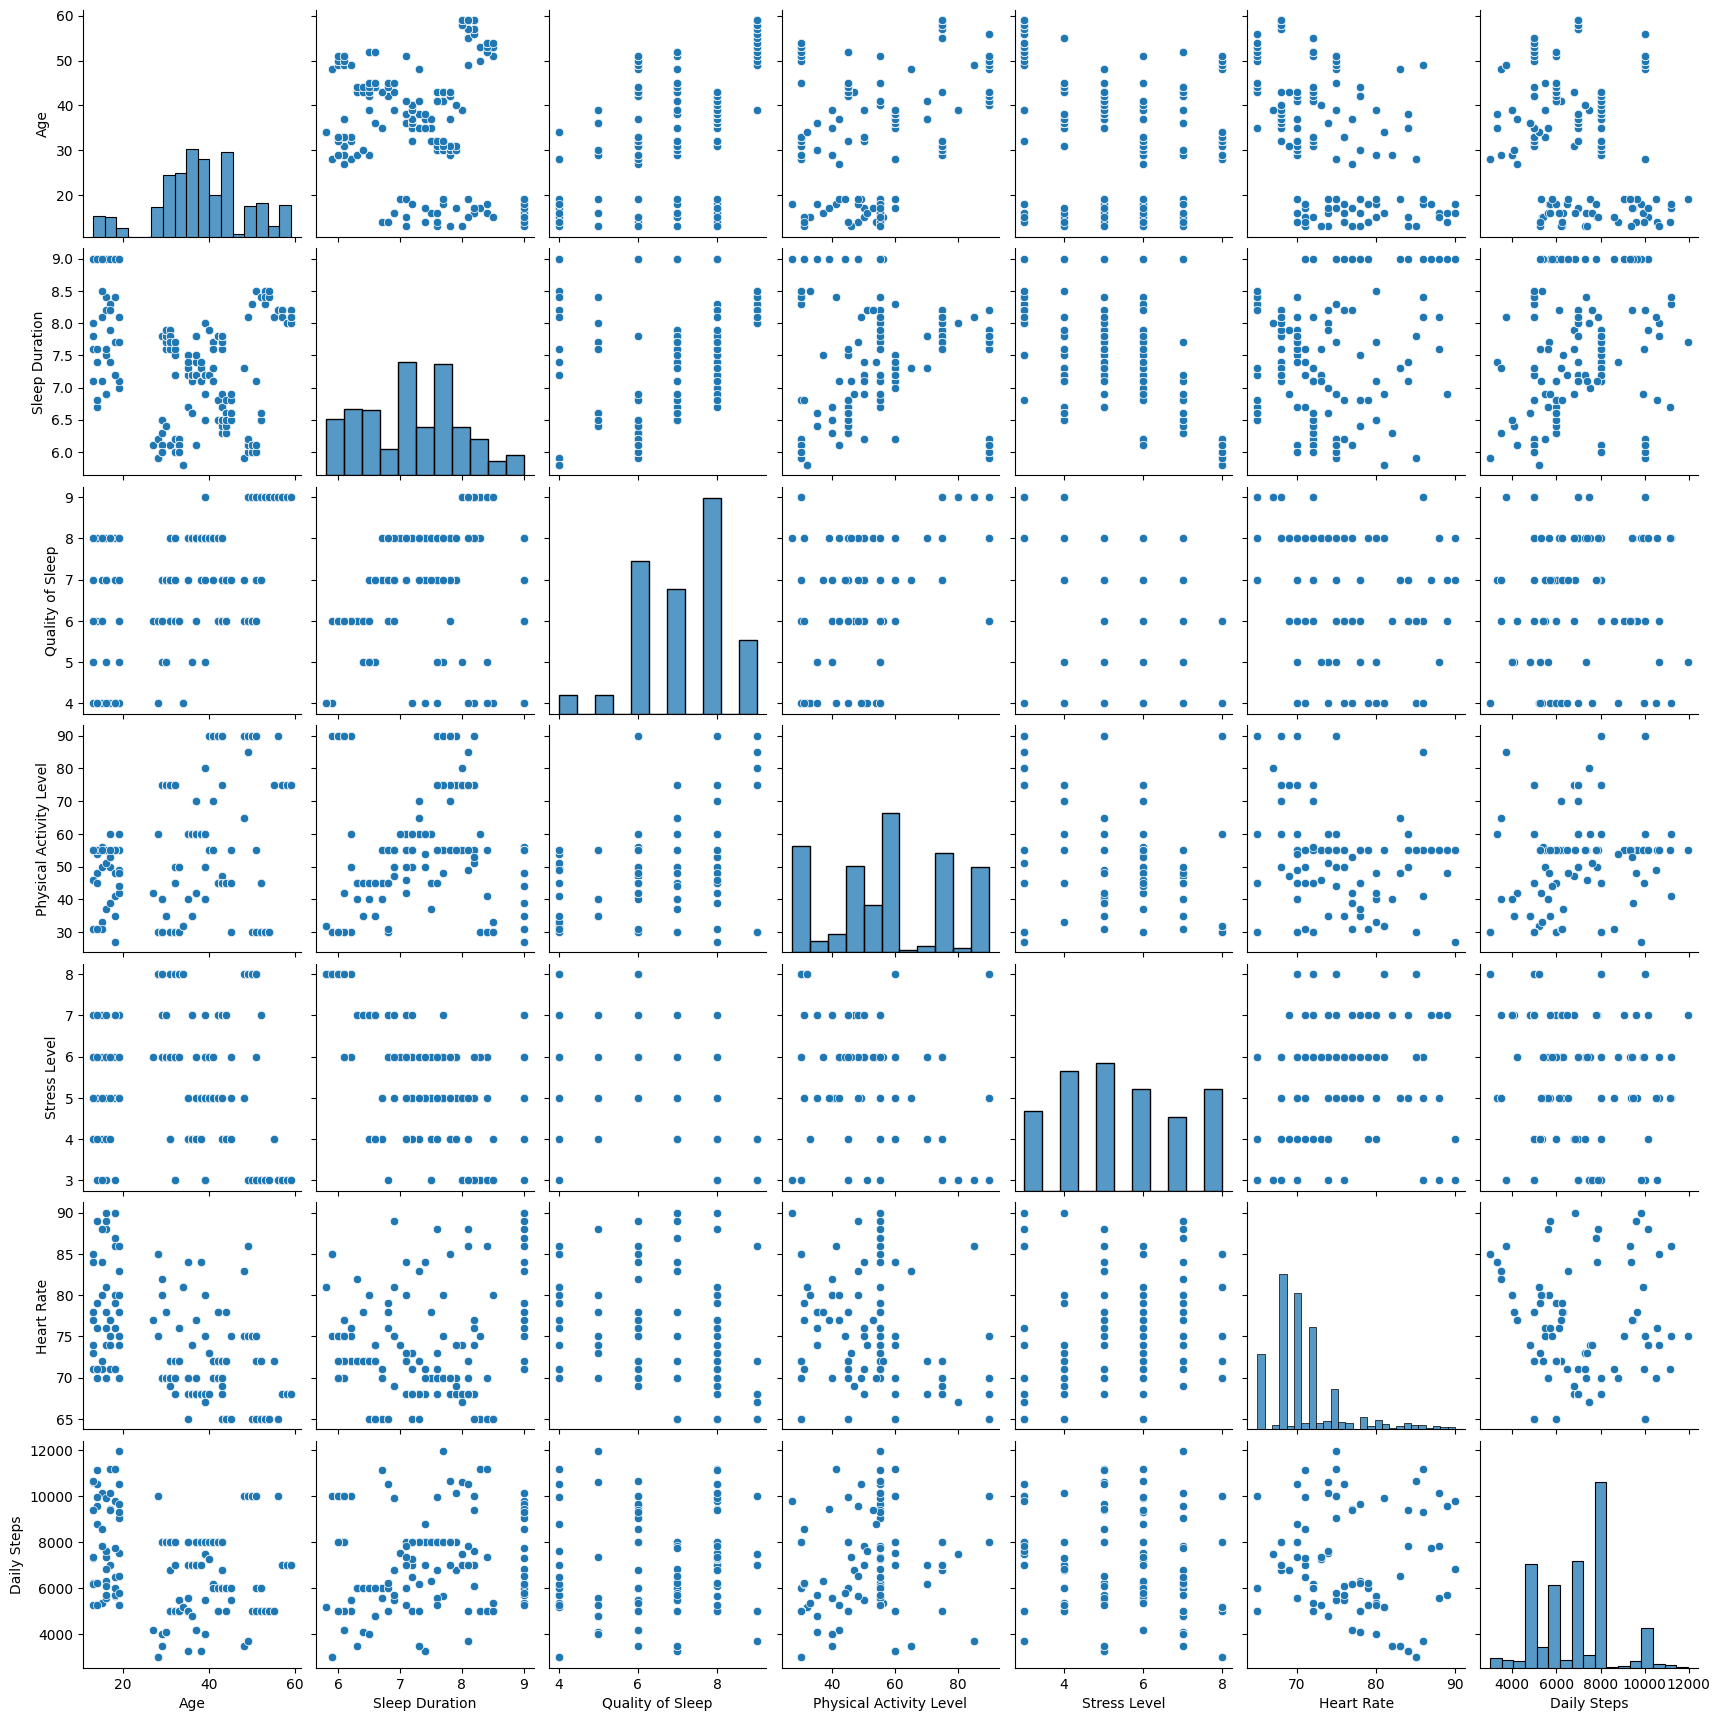

In [ ]:
sns.pairplot(data[numerical_cols])
plt.show()

In [ ]:
# 4. Bivariate Analysis (Categorical vs Numerical)
def categorical_vs_numerical(data, cat_col, num_col):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=cat_col, y=num_col, data=data)
    plt.title(f'{num_col} by {cat_col}', fontsize=16)
    plt.xlabel(cat_col, fontsize=14)
    plt.ylabel(num_col, fontsize=14)
    plt.show()

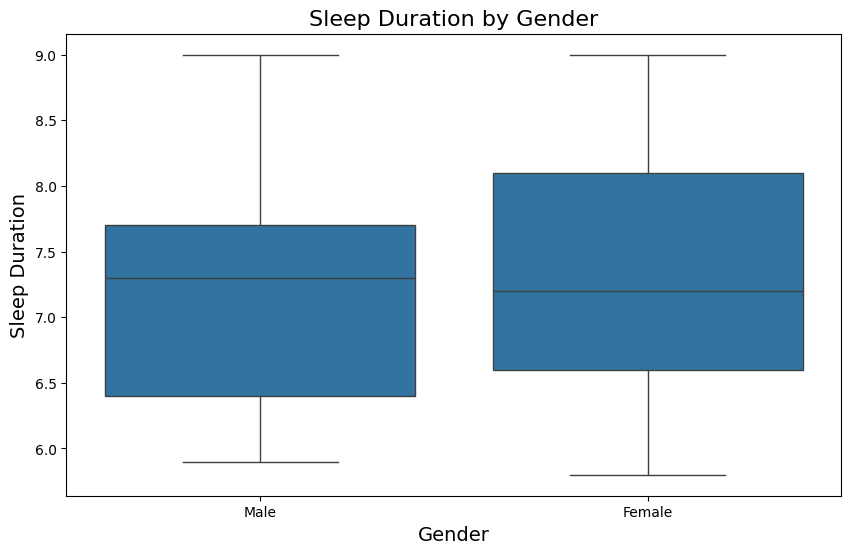

In [ ]:
categorical_vs_numerical(data, 'Gender', 'Sleep Duration')

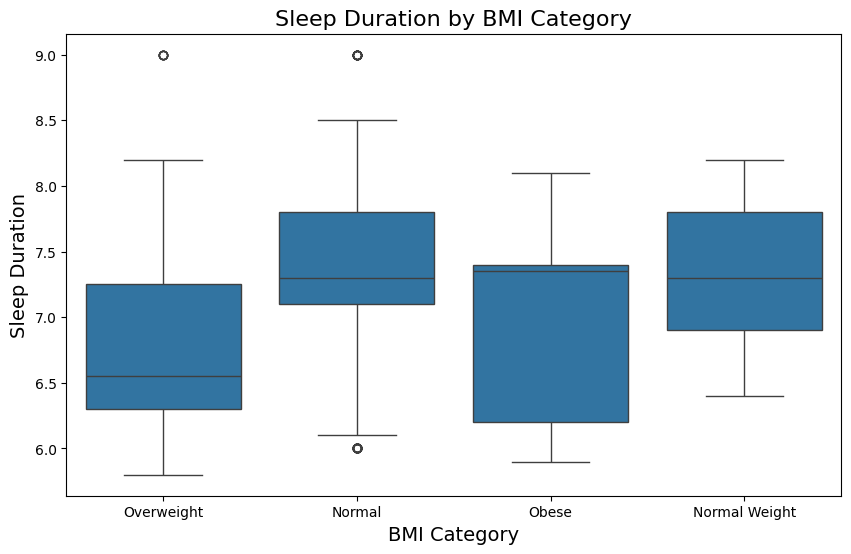

In [ ]:
# Example: Sleep Duration vs BMI Category
categorical_vs_numerical(data, 'BMI Category', 'Sleep Duration')

In [ ]:
# 5. Bivariate Analysis (Scatter Plots for Continuous Variables)
def scatter_plot(data, x_col, y_col):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x_col, y=y_col, data=data)
    plt.title(f'Scatter Plot: {x_col} vs {y_col}', fontsize=16)
    plt.xlabel(x_col, fontsize=14)
    plt.ylabel(y_col, fontsize=14)
    plt.show()

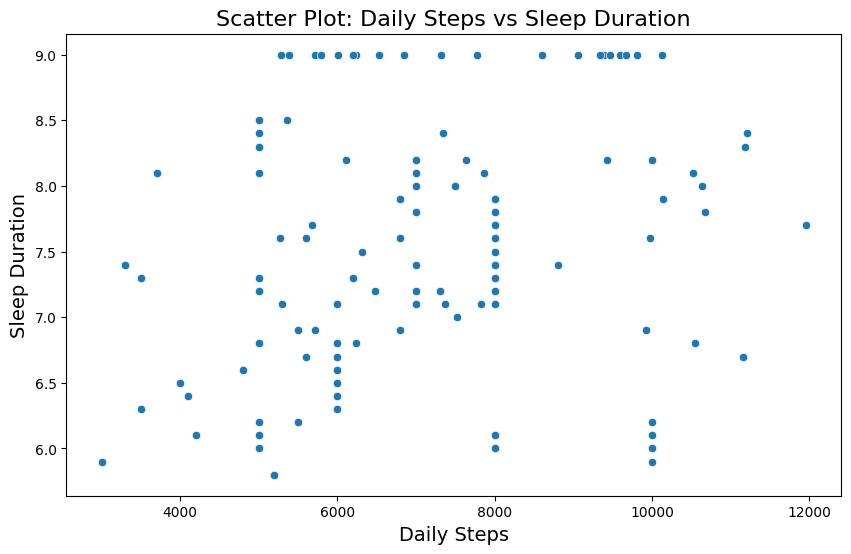

In [ ]:
scatter_plot(data, 'Daily Steps', 'Sleep Duration')

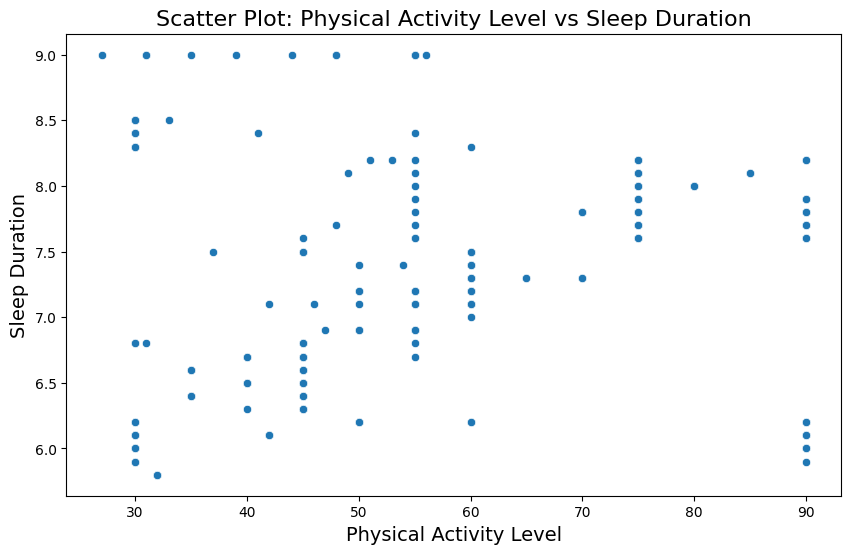

In [ ]:
scatter_plot(data, 'Physical Activity Level', 'Sleep Duration')

# Categorical Data Analysis

In [ ]:
# 6. Categorical Data Analysis (Stacked Bar Plots)
def stacked_bar_plot(data, col1, col2):
    cross_tab = pd.crosstab(data[col1], data[col2], normalize='index')
    cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6), cmap='viridis')
    plt.title(f'Stacked Bar Plot: {col1} vs {col2}', fontsize=16)
    plt.xlabel(col1, fontsize=14)
    plt.ylabel('Proportion', fontsize=14)
    plt.show()

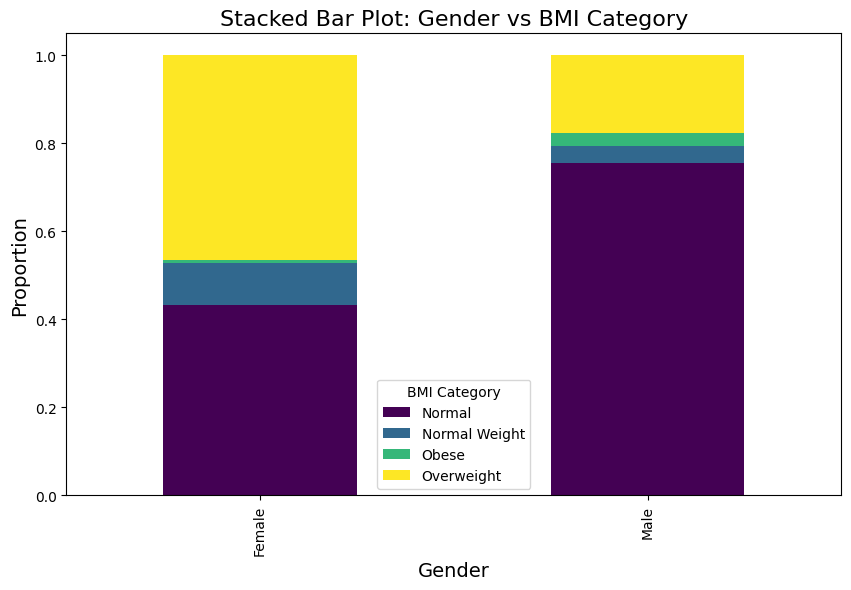

In [ ]:
# Example: Gender vs BMI Category
stacked_bar_plot(data, 'Gender', 'BMI Category')

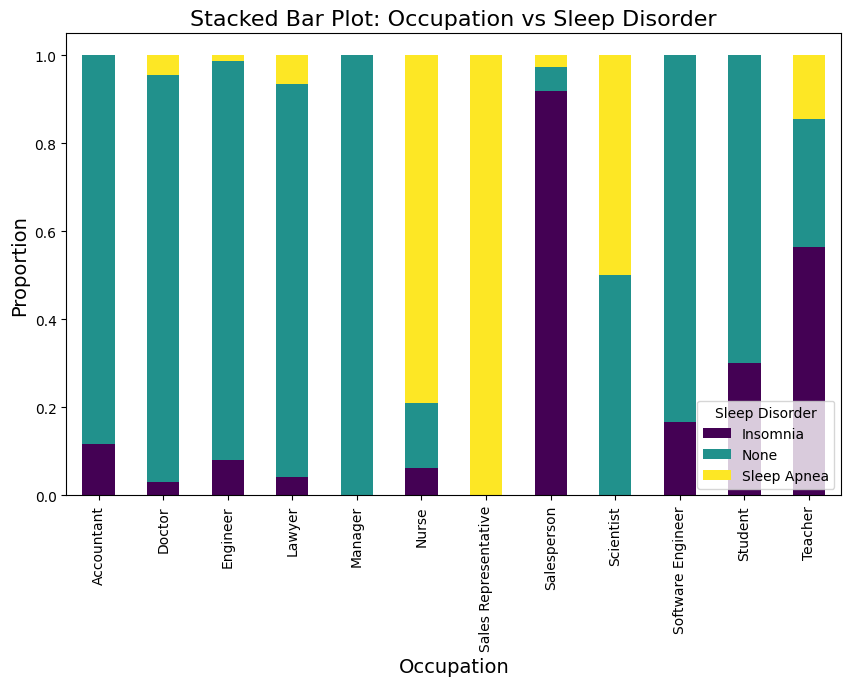

In [ ]:
# Example: Occupation vs Sleep Disorder
stacked_bar_plot(data, 'Occupation', 'Sleep Disorder')

# PCA

In [ ]:
# Required Libraries
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_regression

# Assuming your dataset is already loaded into 'data'
# Replace 'data' with your actual dataset name if different

# Step 1: Data Cleaning (Handle missing values)
data.dropna(inplace=True)

# Step 2: Drop irrelevant columns (like Person ID if it exists)
# Adjust the columns to exclude non-numeric ones like 'Occupation' or IDs if necessary
data = data.drop(columns=['Person ID', 'Occupation'])  # Adjust column names accordingly

# Step 3: Selecting numeric features for correlation analysis
numeric_features = data.select_dtypes(include=np.number)  # Selecting only numeric columns

# Step 4: Calculate correlation matrix with the target ('Sleep Duration')
correlation_matrix = numeric_features.corr()
correlation_with_target = abs(correlation_matrix['Sleep Duration']).sort_values(ascending=False)

# Step 5: Select top correlated features (excluding 'Sleep Duration' itself)
selected_features = correlation_with_target[1:].index.tolist()  # Exclude 'Sleep Duration' itself

# Step 6: Feature Selection based on SelectKBest and f_regression
# Set up the feature (X) and target (y) variables
X = data[selected_features]
y = data['Sleep Duration']

# Perform feature selection using SelectKBest with f_regression
selector = SelectKBest(score_func=f_regression, k=min(3, len(selected_features)))  # Select top 3 features
X_selected = selector.fit_transform(X, y)

# Get the selected feature indices
selected_indices = selector.get_support(indices=True)

# Get the selected feature names
selected_feature_names = X.columns[selected_indices]

print("Selected Features:", selected_feature_names)

# Optional: You can create a new dataframe with the selected features
X_selected_df = pd.DataFrame(X_selected, columns=selected_feature_names)
print(X_selected_df.head())


Selected Features: Index(['Stress Level', 'Quality of Sleep', 'Physical Activity Level'], dtype='object')
   Stress Level  Quality of Sleep  Physical Activity Level
0           8.0               4.0                     30.0
1           8.0               4.0                     30.0
2           8.0               4.0                     30.0
3           7.0               6.0                     40.0
4           7.0               5.0                     40.0


# Personalized Sleep Recommendations Using Multi-Factor Analysis

# Predicting Sleep Duration

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# Load the dataset
file_path = '/content/final_dataset_with_added_columns.csv'  # Adjust path if needed
df = pd.read_csv(file_path)

# Preprocess the data
df = df.dropna(subset=['Sleep Duration'])
df['Sleep Disorder'] = df['Sleep Disorder'].fillna("No Disorder")

label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    if column != 'Sleep Duration':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

X = df.drop(['Sleep Duration','Quality of Sleep','Person ID'], axis=1)
y = df['Sleep Duration']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train and evaluate the model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Linear Regression Results:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")


Linear Regression Results:
Mean Squared Error: 0.2408
R-squared: 0.5784


In [ ]:
# 1. Linear Regression
linear_model = LinearRegression()
linear_cv_scores = cross_val_score(linear_model, X_train, y_train, cv=5)
linear_model.fit(X_train, y_train)
linear_y_pred = linear_model.predict(X_test)

print("Linear Regression Cross-Validation Scores:", linear_cv_scores)
print("Mean CV Score for Linear Regression:", linear_cv_scores.mean())
print("Linear Regression Test R2 Score:", r2_score(y_test, linear_y_pred))
print("Linear Regression Test MSE:", mean_squared_error(y_test, linear_y_pred))


Linear Regression Cross-Validation Scores: [0.61527048 0.66428661 0.6070015  0.71929825 0.52645456]
Mean CV Score for Linear Regression: 0.6264622808383249
Linear Regression Test R2 Score: 0.5783904891984932
Linear Regression Test MSE: 0.24075465422772205


In [ ]:
from sklearn.tree import DecisionTreeRegressor
# 2. Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_cv_scores = cross_val_score(dt_model, X_train, y_train, cv=5)
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)

print("Decision Tree Regressor Cross-Validation Scores:", dt_cv_scores)
print("Mean CV Score for Decision Tree Regressor:", dt_cv_scores.mean())
print("Decision Tree Test R2 Score:", r2_score(y_test, dt_y_pred))
print("Decision Tree Test MSE:", mean_squared_error(y_test, dt_y_pred))

Decision Tree Regressor Cross-Validation Scores: [0.85563657 0.80156899 0.88652164 0.89144724 0.59518107]
Mean CV Score for Decision Tree Regressor: 0.8060710995187488
Decision Tree Test R2 Score: 0.5990422235306792
Decision Tree Test MSE: 0.22896174863387977


In [ ]:
# 3. Support Vector Regressor (SVR)
svr_model = SVR()
svr_cv_scores = cross_val_score(svr_model, X_train, y_train, cv=5)
svr_model.fit(X_train, y_train)
svr_y_pred = svr_model.predict(X_test)

print("SVR Cross-Validation Scores:", svr_cv_scores)
print("Mean CV Score for SVR:", svr_cv_scores.mean())
print("SVR Test R2 Score:", r2_score(y_test, svr_y_pred))
print("SVR Test MSE:", mean_squared_error(y_test, svr_y_pred))

SVR Cross-Validation Scores: [0.80290865 0.87109045 0.93975769 0.94819324 0.84726232]
Mean CV Score for SVR: 0.8818424704586626
SVR Test R2 Score: 0.8649314934039635
SVR Test MSE: 0.07712912249243158


In [ ]:
# 4. XGBoost Regressor
from xgboost import XGBRegressor
xg_model = XGBRegressor(random_state=42)
xg_cv_scores = cross_val_score(xg_model, X_train, y_train, cv=5)
xg_model.fit(X_train, y_train)
xg_y_pred = xg_model.predict(X_test)

print("XGBoost Regressor Cross-Validation Scores:", xg_cv_scores)
print("Mean CV Score for XGBoost Regressor:", xg_cv_scores.mean())
print("XGBoost Test R2 Score:", r2_score(y_test, xg_y_pred))
print("XGBoost Test MSE:", mean_squared_error(y_test, xg_y_pred))


XGBoost Regressor Cross-Validation Scores: [0.85137568 0.86220763 0.87466897 0.92878165 0.66172698]
Mean CV Score for XGBoost Regressor: 0.8357521811045178
XGBoost Test R2 Score: 0.7224050149046621
XGBoost Test MSE: 0.15851702331127504


In [ ]:
# 5. Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

print("Random Forest Regressor Cross-Validation Scores:", rf_cv_scores)
print("Mean CV Score for Random Forest Regressor:", rf_cv_scores.mean())
print("Random Forest Test R2 Score:", r2_score(y_test, rf_y_pred))
print("Random Forest Test MSE:", mean_squared_error(y_test, rf_y_pred))

Random Forest Regressor Cross-Validation Scores: [0.84765047 0.89107751 0.91485035 0.94008026 0.77768919]
Mean CV Score for Random Forest Regressor: 0.8742695584468951
Random Forest Test R2 Score: 0.8528576252414577
Random Forest Test MSE: 0.08402374863387956


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ["LR", "DTR", "SVR", "XGBoost Re", "RFR"]
cv_scores = [
    [0.61527048, 0.66428661, 0.6070015, 0.71929825, 0.52645456],
    [0.85563657, 0.80156899, 0.88652164, 0.89144724, 0.59518107],
    [0.80290865, 0.87109045, 0.93975769, 0.94819324, 0.84726232],
    [0.85137568, 0.86220763, 0.87466897, 0.92878165, 0.66172698],
    [0.84765047, 0.89107751, 0.91485035, 0.94008026, 0.77768919]
]
mean_cv_scores = [0.6264622808383249, 0.8060710995187488, 0.8818424704586626, 0.8357521811045178, 0.8742695584468951]
test_r2_scores = [0.5783904891984932, 0.5990422235306792, 0.8649314934039635, 0.7224050149046621, 0.8528576252414577]
test_mse = [0.24075465422772205, 0.22896174863387977, 0.07712912249243158, 0.15851702331127504, 0.08402374863387956]

# Create DataFrame for tabular format
data = {
    "Model": models,
    "Cross-Validation Scores": cv_scores,
    "Mean CV Score": mean_cv_scores,
    "Test R2 Score": test_r2_scores,
    "Test MSE": test_mse
}
df = pd.DataFrame(data)

# Display the DataFrame
df




,Model,Cross-Validation Scores,Mean CV Score,Test R2 Score,Test MSE
0,LR,"[0.61527048, 0.66428661, 0.6070015, 0.71929825...",0.626462,0.578390,0.240755
1,DTR,"[0.85563657, 0.80156899, 0.88652164, 0.8914472...",0.806071,0.599042,0.228962
2,SVR,"[0.80290865, 0.87109045, 0.93975769, 0.9481932...",0.881842,0.864931,0.077129
3,XGBoost Re,"[0.85137568, 0.86220763, 0.87466897, 0.9287816...",0.835752,0.722405,0.158517
4,RFR,"[0.84765047, 0.89107751, 0.91485035, 0.9400802...",0.874270,0.852858,0.084024


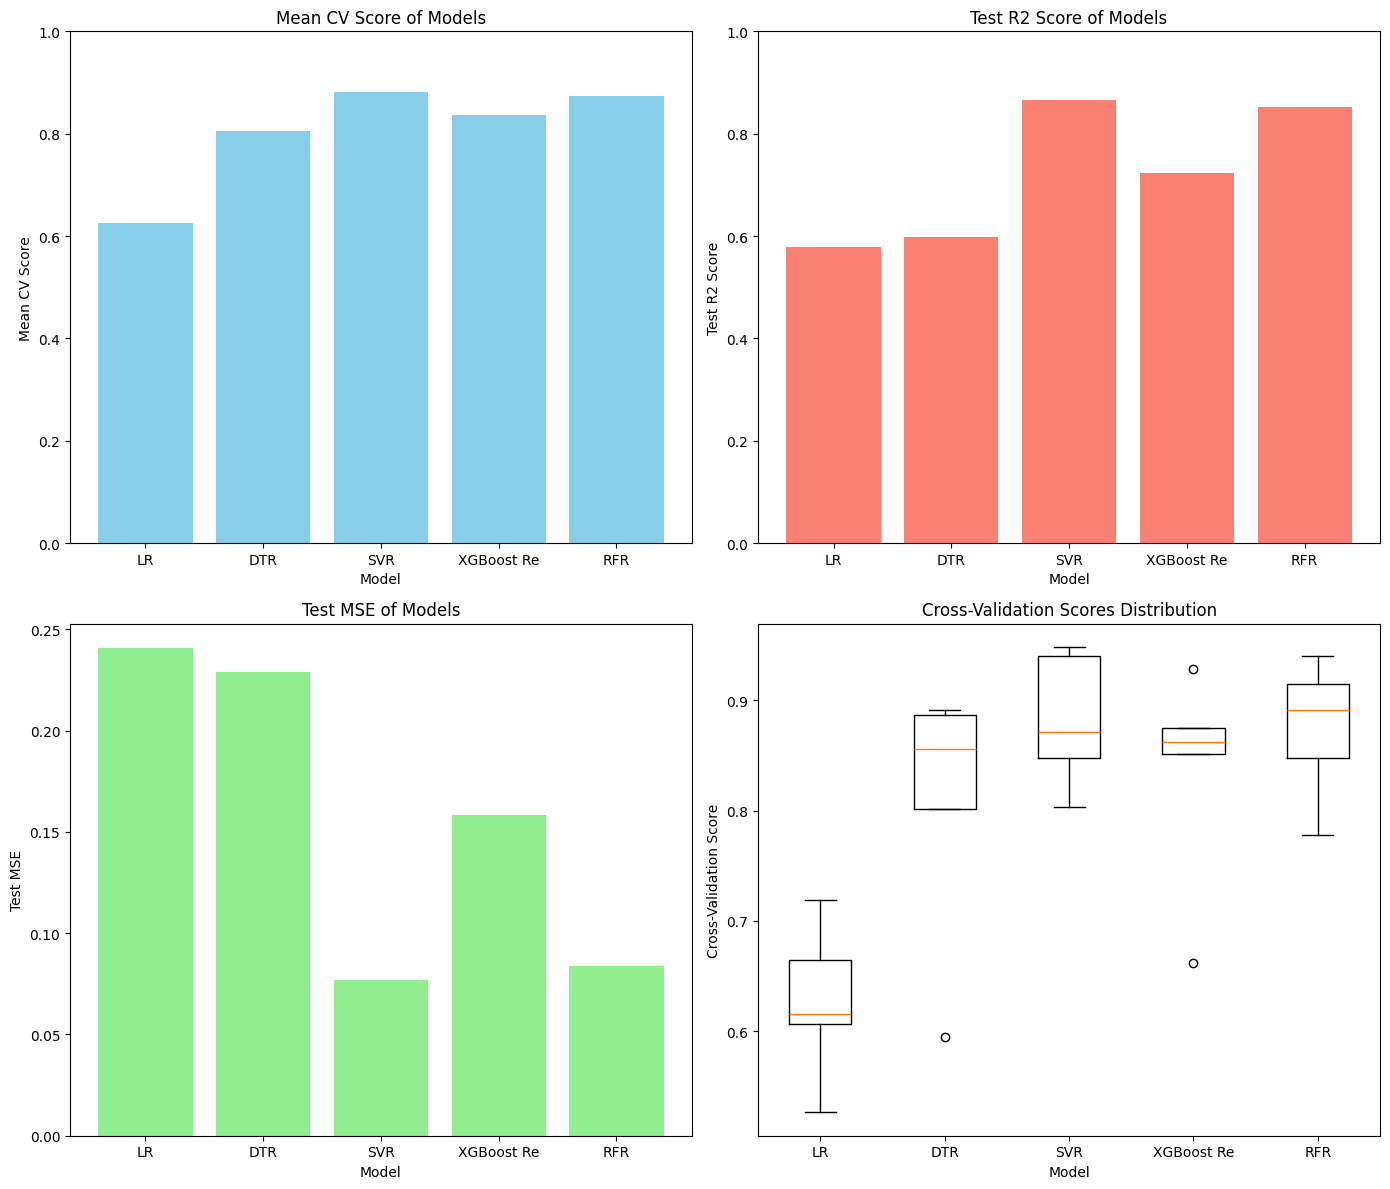

In [ ]:
# Set up the figure and axes for visualizations
fig, ax = plt.subplots(2, 2, figsize=(14, 12))

# Mean CV Score Bar Plot
ax[0, 0].bar(models, mean_cv_scores, color='skyblue')
ax[0, 0].set_title("Mean CV Score of Models")
ax[0, 0].set_xlabel("Model")
ax[0, 0].set_ylabel("Mean CV Score")
ax[0, 0].set_ylim(0, 1)

# Test R2 Score Bar Plot
ax[0, 1].bar(models, test_r2_scores, color='salmon')
ax[0, 1].set_title("Test R2 Score of Models")
ax[0, 1].set_xlabel("Model")
ax[0, 1].set_ylabel("Test R2 Score")
ax[0, 1].set_ylim(0, 1)

# Test MSE Bar Plot
ax[1, 0].bar(models, test_mse, color='lightgreen')
ax[1, 0].set_title("Test MSE of Models")
ax[1, 0].set_xlabel("Model")
ax[1, 0].set_ylabel("Test MSE")

# Box Plot for Cross-Validation Scores
cv_score_array = np.array(cv_scores)
ax[1, 1].boxplot(cv_score_array.T, labels=models)
ax[1, 1].set_title("Cross-Validation Scores Distribution")
ax[1, 1].set_xlabel("Model")
ax[1, 1].set_ylabel("Cross-Validation Score")

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


# Predicting Sleep Quality

In [ ]:
# Import necessary libraries (assuming they were already imported)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
import numpy as np

# Load the dataset
file_path = '/content/final_dataset_with_added_columns.csv'  # Adjust path if needed
data = pd.read_csv(file_path)

# Display first few rows
print(data.head())

# Fill missing values in 'Quality of Sleep' with the most common value (or other appropriate method)
data['Quality of Sleep'] = data['Quality of Sleep'].fillna(data['Quality of Sleep'].mode()[0])

# Encode categorical columns (excluding the target column 'Quality of Sleep')
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    if column != 'Quality of Sleep':  # Target column should be encoded separately
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

# Encode the target column 'Quality of Sleep'
target_encoder = LabelEncoder()
data['Quality of Sleep'] = target_encoder.fit_transform(data['Quality of Sleep'])

# Define features (X) and target (y)
X = data.drop(['Sleep Disorder', 'Quality of Sleep', 'Person ID'], axis=1)  # Drop irrelevant columns
y = data['Quality of Sleep']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models to test
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Classifier": SVC(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# Evaluate each model with modified target names
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Convert target names to strings to avoid TypeError
    target_names = [str(class_label) for class_label in target_encoder.classes_]

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=target_names)

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", report)
    print("\n" + "="*60 + "\n")



   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  Walking Distance  \
0         126/83          77         4200            NaN       1958.548383

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:23:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model: XGBoost
Accuracy: 0.8907
Classification Report:
               precision    recall  f1-score   support

           4       0.33      0.60      0.43         5
           5       0.60      0.50      0.55         6
           6       0.95      0.87      0.91        46
           7       0.97      0.84      0.90        38
           8       0.88      0.96      0.92        69
           9       1.00      1.00      1.00        19

    accuracy                           0.89       183
   macro avg       0.79      0.79      0.78       183
weighted avg       0.91      0.89      0.89       183





In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np


In [ ]:
logistic_model = LogisticRegression(max_iter=1000)
# Perform cross-validation
logistic_cv_scores = cross_val_score(logistic_model, X_train, y_train, cv=5)
logistic_model.fit(X_train, y_train)
logistic_y_pred = logistic_model.predict(X_test)

# Print Cross-Validation Results
print("Logistic Regression Cross-Validation Scores:", logistic_cv_scores)
print("Mean CV Accuracy:", logistic_cv_scores.mean())

# Confusion Matrix and Classification Report
print("Confusion Matrix:\n", confusion_matrix(y_test, logistic_y_pred))
print("Classification Report:\n", classification_report(y_test, logistic_y_pred))


Logistic Regression Cross-Validation Scores: [0.87209302 0.86046512 0.84705882 0.82352941 0.87058824]
Mean CV Accuracy: 0.8547469220246239
Confusion Matrix:
 [[ 0  0  3  1  1  0]
 [ 0  3  1  0  2  0]
 [ 2  3 38  3  0  0]
 [ 4  0  0 31  3  0]
 [ 0  0  1  2 66  0]
 [ 0  0  0  0  0 19]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.50      0.50      0.50         6
           2       0.88      0.83      0.85        46
           3       0.84      0.82      0.83        38
           4       0.92      0.96      0.94        69
           5       1.00      1.00      1.00        19

    accuracy                           0.86       183
   macro avg       0.69      0.68      0.69       183
weighted avg       0.86      0.86      0.86       183



In [ ]:
rf_model = RandomForestClassifier()
# Perform cross-validation
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

# Print Cross-Validation Results
print("Random Forest Cross-Validation Scores:", rf_cv_scores)
print("Mean CV Accuracy:", rf_cv_scores.mean())

# Confusion Matrix and Classification Report
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_y_pred))
print("Classification Report:\n", classification_report(y_test, rf_y_pred))


Random Forest Cross-Validation Scores: [0.94186047 0.93023256 0.94117647 0.95294118 0.94117647]
Mean CV Accuracy: 0.9414774281805747
Confusion Matrix:
 [[ 2  0  0  1  2  0]
 [ 0  3  1  0  2  0]
 [ 0  1 41  0  4  0]
 [ 1  0  0 33  4  0]
 [ 0  0  0  1 68  0]
 [ 0  0  0  0  0 19]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.40      0.50         5
           1       0.75      0.50      0.60         6
           2       0.98      0.89      0.93        46
           3       0.94      0.87      0.90        38
           4       0.85      0.99      0.91        69
           5       1.00      1.00      1.00        19

    accuracy                           0.91       183
   macro avg       0.86      0.77      0.81       183
weighted avg       0.91      0.91      0.90       183



In [ ]:
dt_model = DecisionTreeClassifier()
# Perform cross-validation
dt_cv_scores = cross_val_score(dt_model, X_train, y_train, cv=5)
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)

# Print Cross-Validation Results
print("Decision Tree Cross-Validation Scores:", dt_cv_scores)
print("Mean CV Accuracy:", dt_cv_scores.mean())

# Confusion Matrix and Classification Report
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_y_pred))
print("Classification Report:\n", classification_report(y_test, dt_y_pred))


Decision Tree Cross-Validation Scores: [0.91860465 0.88372093 0.94117647 0.94117647 0.91764706]
Mean CV Accuracy: 0.9204651162790698
Confusion Matrix:
 [[ 2  0  0  0  3  0]
 [ 0  3  1  0  2  0]
 [ 0  1 41  0  4  0]
 [ 0  1  1 33  3  0]
 [ 4  3  0  0 61  1]
 [ 0  0  0  0  0 19]]
Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.40      0.36         5
           1       0.38      0.50      0.43         6
           2       0.95      0.89      0.92        46
           3       1.00      0.87      0.93        38
           4       0.84      0.88      0.86        69
           5       0.95      1.00      0.97        19

    accuracy                           0.87       183
   macro avg       0.74      0.76      0.75       183
weighted avg       0.88      0.87      0.87       183



In [ ]:
svc_model = SVC()
# Perform cross-validation
svc_cv_scores = cross_val_score(svc_model, X_train, y_train, cv=5)
svc_model.fit(X_train, y_train)
svc_y_pred = svc_model.predict(X_test)

# Print Cross-Validation Results
print("Support Vector Classifier Cross-Validation Scores:", svc_cv_scores)
print("Mean CV Accuracy:", svc_cv_scores.mean())

# Confusion Matrix and Classification Report
print("Confusion Matrix:\n", confusion_matrix(y_test, svc_y_pred))
print("Classification Report:\n", classification_report(y_test, svc_y_pred))


Support Vector Classifier Cross-Validation Scores: [0.94186047 0.93023256 0.91764706 0.95294118 0.89411765]
Mean CV Accuracy: 0.9273597811217511
Confusion Matrix:
 [[ 1  0  2  0  2  0]
 [ 0  3  0  0  3  0]
 [ 1  2 40  0  3  0]
 [ 2  0  0 33  3  0]
 [ 1  0  0  0 68  0]
 [ 0  0  0  0  2 17]]
Classification Report:
               precision    recall  f1-score   support

           0       0.20      0.20      0.20         5
           1       0.60      0.50      0.55         6
           2       0.95      0.87      0.91        46
           3       1.00      0.87      0.93        38
           4       0.84      0.99      0.91        69
           5       1.00      0.89      0.94        19

    accuracy                           0.89       183
   macro avg       0.77      0.72      0.74       183
weighted avg       0.89      0.89      0.88       183



In [ ]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
# Perform cross-validation
xgb_cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5)
xgb_model.fit(X_train, y_train)
xgb_y_pred = xgb_model.predict(X_test)

# Print Cross-Validation Results
print("XGBoost Cross-Validation Scores:", xgb_cv_scores)
print("Mean CV Accuracy:", xgb_cv_scores.mean())

# Confusion Matrix and Classification Report
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_y_pred))
print("Classification Report:\n", classification_report(y_test, xgb_y_pred))


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:26:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:26:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:26:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:26:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:26:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost Cross-Validation Scores: [0.94186047 0.93023256 0.91764706 0.95294118 0.90588235]
Mean CV Accuracy: 0.9297127222982218
Confusion Matrix:
 [[ 3  0  0  0  2  0]
 [ 0  3  1  0  2  0]
 [ 2  1 40  0  3  0]
 [ 2  1  1 32  2  0]
 [ 2  0  0  1 66  0]
 [ 0  0  0  0  0 19]]
Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.60      0.43         5
           1       0.60      0.50      0.55         6
           2       0.95      0.87      0.91        46
           3       0.97      0.84      0.90        38
           4       0.88      0.96      0.92        69
           5       1.00      1.00      1.00        19

    accuracy                           0.89       183
   macro avg       0.79      0.79      0.78       183
weighted avg       0.91      0.89      0.89       183



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:26:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
print("Summary of Model Cross-Validation Mean Accuracies:")
print("Logistic Regression:", logistic_cv_scores.mean())
print("Random Forest:", rf_cv_scores.mean())
print("Decision Tree:", dt_cv_scores.mean())
print("Support Vector Classifier:", svc_cv_scores.mean())
print("XGBoost:", xgb_cv_scores.mean())

print("Max Accuracy-Random Forest: ",rf_cv_scores.mean())

Summary of Model Cross-Validation Mean Accuracies:
Logistic Regression: 0.8547469220246239
Random Forest: 0.9414774281805747
Decision Tree: 0.9204651162790698
Support Vector Classifier: 0.9273597811217511
XGBoost: 0.9297127222982218
Max Accuracy-Random Forest:  0.9414774281805747


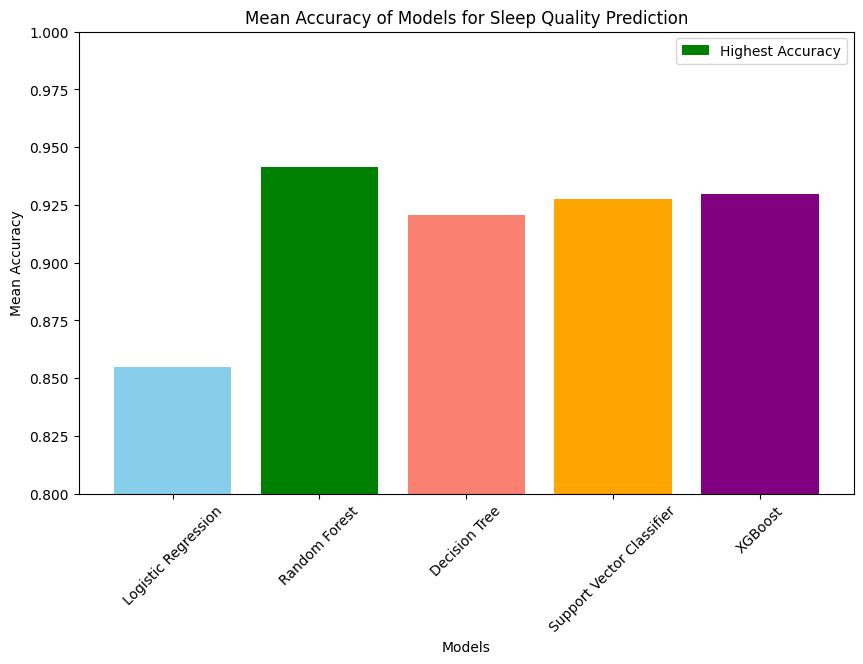

In [ ]:
import matplotlib.pyplot as plt

# Model names and their mean accuracies
models = ["Logistic Regression", "Random Forest", "Decision Tree", "Support Vector Classifier", "XGBoost"]
accuracies = [0.8547469220246239, 0.9414774281805747, 0.9204651162790698, 0.9273597811217511, 0.9297127222982218]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['skyblue', 'lightgreen', 'salmon', 'orange', 'purple'])
plt.xlabel("Models")
plt.ylabel("Mean Accuracy")
plt.title("Mean Accuracy of Models for Sleep Quality Prediction")
plt.ylim(0.8, 1)  # Set y-axis limits to highlight accuracy differences
plt.xticks(rotation=45)

# Highlighting the highest accuracy model
max_accuracy = max(accuracies)
max_model_index = accuracies.index(max_accuracy)
plt.bar(models[max_model_index], accuracies[max_model_index], color='green', label="Highest Accuracy")

plt.legend()
plt.show()


# Sleep Disorder Predicton

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# Load the dataset
file_path = '/content/final_dataset_with_added_columns.csv'  # Adjust path if needed
df = pd.read_csv(file_path)

# Preprocess the data
df = df.dropna(subset=['Sleep Duration'])
df['Sleep Disorder'] = df['Sleep Disorder'].fillna("No Disorder")

label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    if column != 'Sleep Duration':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

X = df.drop(['Sleep Disorder','Quality of Sleep','Person ID'], axis=1)
Y = df['Sleep Disorder']
X_stdscle = StandardScaler().fit_transform(X.values)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Implementation

KNN Implementation

In [ ]:
#training the KNN model and predicting the classes
X_stdscle_df = pd.DataFrame(X_stdscle, index=X.index, columns=X.columns)
x_train, x_test, y_train, y_test = train_test_split(X_stdscle_df,Y,test_size=0.3, random_state =1)
knn_clf = KNeighborsClassifier(n_neighbors =5,p=2,metric='minkowski')
knn_clf.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
KNeighborsClassifier()

KNeighborsClassifier()

k: Here we have taken nearest neighbor as 5(default value).

p: Taken p=2 to find euclidean_distance (default value)

metric: We have taken default=’minkowski’(default value)

In [ ]:
print("Train Accuracy : ", 100*(round(accuracy_score(y_train,knn_clf.predict(x_train)),5)))
print("Test Accuracy : ", 100*(round(accuracy_score(y_test,knn_clf.predict(x_test)),5)))
result = confusion_matrix(y_test, knn_clf.predict(x_test))
print("Confusion Matrix:")
print(result)
print("Classification Report : \n", classification_report(y_test, knn_clf.predict(x_test)))

Train Accuracy :  92.27199999999999
Test Accuracy :  86.339
Confusion Matrix:
[[ 24   5   4]
 [  8 114   1]
 [  3   4  20]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.69      0.73      0.71        33
           1       0.93      0.93      0.93       123
           2       0.80      0.74      0.77        27

    accuracy                           0.86       183
   macro avg       0.80      0.80      0.80       183
weighted avg       0.86      0.86      0.86       183



**Result 2**

In [ ]:
#training the KNN model and predicting the classes
X_stdscle_df = pd.DataFrame(X_stdscle, index=X.index, columns=X.columns)
x_train, x_test, y_train, y_test = train_test_split(X_stdscle_df,Y,test_size=0.3, random_state =1)
knn_clf = KNeighborsClassifier(n_neighbors = 3,p=2,metric='minkowski')
knn_clf.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
KNeighborsClassifier(n_neighbors=3)

KNeighborsClassifier(n_neighbors=3)

k: Here we have taken nearest neighbor as 3.

p: Taken p=2 to find euclidean_distance

metric: We have taken default=’minkowski’

In [ ]:
#printing the accuracy and all other scores
print("Train Accuracy : ", 100*(round(accuracy_score(y_train,knn_clf.predict(x_train)),5)))
print("Test Accuracy : ", 100*(round(accuracy_score(y_test,knn_clf.predict(x_test)),5)))
result = confusion_matrix(y_test, knn_clf.predict(x_test))
print("Confusion Matrix:")
print(result)
print("Classification Report : \n", classification_report(y_test, knn_clf.predict(x_test)))

Train Accuracy :  93.67699999999999
Test Accuracy :  82.514
Confusion Matrix:
[[ 27   4   2]
 [ 16 106   1]
 [  5   4  18]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.56      0.82      0.67        33
           1       0.93      0.86      0.89       123
           2       0.86      0.67      0.75        27

    accuracy                           0.83       183
   macro avg       0.78      0.78      0.77       183
weighted avg       0.85      0.83      0.83       183



**RESULT 3**

In [ ]:
#training the KNN model and predicting the classes
X_stdscle_df = pd.DataFrame(X_stdscle, index=X.index, columns=X.columns)
x_train, x_test, y_train, y_test = train_test_split(X_stdscle_df,Y,test_size=0.3, random_state =1)
knn_clf = KNeighborsClassifier(n_neighbors = 2,p=1,metric='minkowski')
knn_clf.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2, p=1)

In [ ]:
KNeighborsClassifier(n_neighbors=2, p=1)

KNeighborsClassifier(n_neighbors=2, p=1)

In [ ]:
print("Train Accuracy : ", 100*(round(accuracy_score(y_train,knn_clf.predict(x_train)),5)))
print("Test Accuracy : ", 100*(round(accuracy_score(y_test,knn_clf.predict(x_test)),5)))
result = confusion_matrix(y_test, knn_clf.predict(x_test))
print("Confusion Matrix:")
print(result)
print("Classification Report : \n", classification_report(y_test, knn_clf.predict(x_test)))

Train Accuracy :  93.67699999999999
Test Accuracy :  82.514
Confusion Matrix:
[[ 27   4   2]
 [ 16 106   1]
 [  5   4  18]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.56      0.82      0.67        33
           1       0.93      0.86      0.89       123
           2       0.86      0.67      0.75        27

    accuracy                           0.83       183
   macro avg       0.78      0.78      0.77       183
weighted avg       0.85      0.83      0.83       183



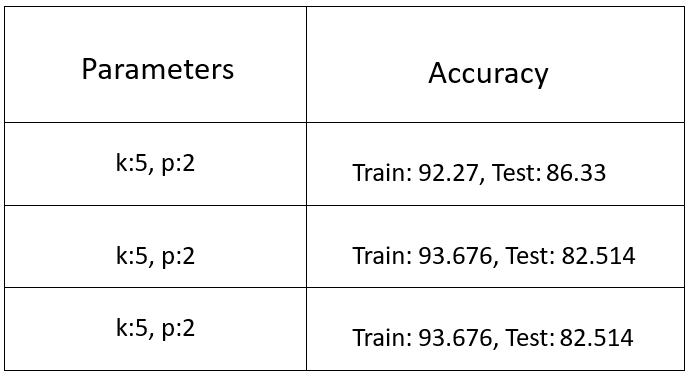

In [ ]:
#MSE
from sklearn.metrics import mean_squared_error
print("MSE:",mean_squared_error(y_test, knn_clf.predict(x_test)))

# RMSE
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, knn_clf.predict(x_test))))

#MAE
from sklearn.metrics import mean_absolute_error
print("MAE:",mean_absolute_error(y_test, knn_clf.predict(x_test)))

#R2
from sklearn.metrics import r2_score
print("R2:",r2_score(y_test, knn_clf.predict(x_test)))

MSE: 0.2896174863387978
RMSE: 0.53816120850429
MAE: 0.21311475409836064
R2: 0.1137609649122806


Text(50.722222222222214, 0.5, 'Prediction Label')

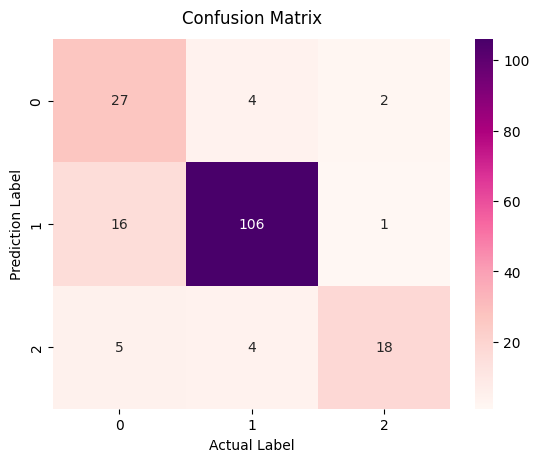

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
sns.heatmap(data=confusion_matrix(y_test, knn_clf.predict(x_test)), annot = True, cmap="RdPu",fmt='g')
plt.title('Confusion Matrix', y=1.02)
plt.xlabel('Actual Label')
plt.ylabel('Prediction Label')

Text(50.722222222222214, 0.5, 'Prediction Label')

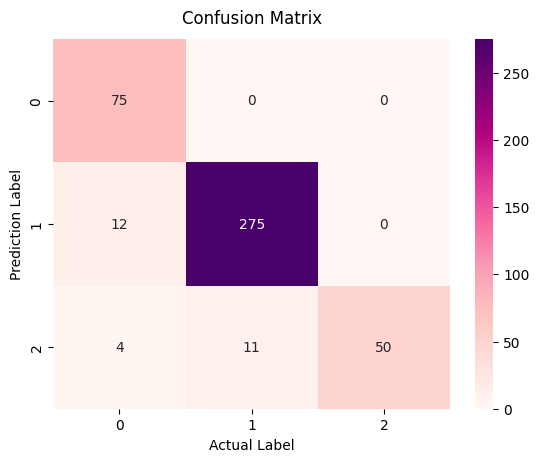

In [ ]:
sns.heatmap(data=confusion_matrix(y_train, knn_clf.predict(x_train)), annot = True, cmap="RdPu",fmt='g')
plt.title('Confusion Matrix', y=1.02)
plt.xlabel('Actual Label')
plt.ylabel('Prediction Label')


# DECISION TREE IMPLEMENTATION
**Hyperparamter in Decision Tree is**

1. criterion: The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. (default='gini')
2. max_depth: Max_depth is one of the most important parameters is max_depth. It captures the essence of how deep the tree can get. More depth in the tree means that it is able to extract more information from the features. However, sometimes, excessive depth might be a cause of worry as it tends to bring along overfitting as well.(default = 'None')
3. splitter: The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.(default='best')


**RESULT 1**

In [ ]:
# Create Decision tree classifier object
clf = DecisionTreeClassifier(criterion='entropy',max_depth=3,splitter='best')

# Train Decision Tree Classifier
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)
acc_decision_tree = round(clf.score(x_train, y_train) * 100, 2)

#Model Accuracy, how often is the classifier correct?
print("Train accuracy:",acc_decision_tree)
print("Test Accuracy:", 100*(metrics.accuracy_score(y_test, y_pred)))

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
print("Classification Report : \n", classification_report(y_test, y_pred))

Train accuracy: 88.99
Test Accuracy: 88.52459016393442
Confusion Matrix:
[[ 27   5   1]
 [  5 116   2]
 [  6   2  19]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.71      0.82      0.76        33
           1       0.94      0.94      0.94       123
           2       0.86      0.70      0.78        27

    accuracy                           0.89       183
   macro avg       0.84      0.82      0.83       183
weighted avg       0.89      0.89      0.89       183




**RESULT 2**

In [ ]:
# Create Decision tree classifier object
clf = DecisionTreeClassifier(criterion='entropy',max_depth=12,splitter='random')

# Train Decision Tree Classifier
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)
acc_decision_tree = round(clf.score(x_train, y_train) * 100, 2)

#Model Accuracy, how often is the classifier correct?
print("Train accuracy:",acc_decision_tree)
print("Test Accuracy:", 100*(metrics.accuracy_score(y_test, y_pred)))

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
print("Classification Report : \n", classification_report(y_test, y_pred))

Train accuracy: 99.53
Test Accuracy: 86.33879781420765
Confusion Matrix:
[[ 27   4   2]
 [  7 109   7]
 [  4   1  22]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.71      0.82      0.76        33
           1       0.96      0.89      0.92       123
           2       0.71      0.81      0.76        27

    accuracy                           0.86       183
   macro avg       0.79      0.84      0.81       183
weighted avg       0.88      0.86      0.87       183



**RESULT 3**

In [ ]:
# Create Decision tree classifier object
clf = DecisionTreeClassifier(criterion='entropy',max_depth=12,splitter='best')

# Train Decision Tree Classifier
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)
acc_decision_tree = round(clf.score(x_train, y_train) * 100, 2)

#Model Accuracy, how often is the classifier correct?
print("Train accuracy:",acc_decision_tree)
print("Test Accuracy:", 100*(metrics.accuracy_score(y_test, y_pred)))

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
print("Classification Report : \n", classification_report(y_test, y_pred))

Train accuracy: 100.0
Test Accuracy: 82.5136612021858
Confusion Matrix:
[[ 24   5   4]
 [ 12 105   6]
 [  2   3  22]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.63      0.73      0.68        33
           1       0.93      0.85      0.89       123
           2       0.69      0.81      0.75        27

    accuracy                           0.83       183
   macro avg       0.75      0.80      0.77       183
weighted avg       0.84      0.83      0.83       183



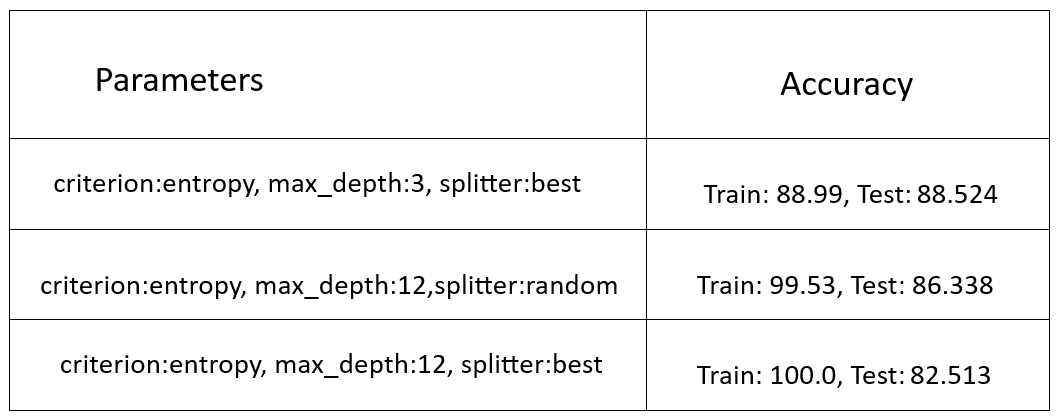

In [ ]:
#MSE
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred))

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#MAE
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, y_pred))

#R2
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.22950819672131148
0.47907013758040845
0.15300546448087432
0.29769736842105254


Text(50.722222222222214, 0.5, 'Prediction Label')

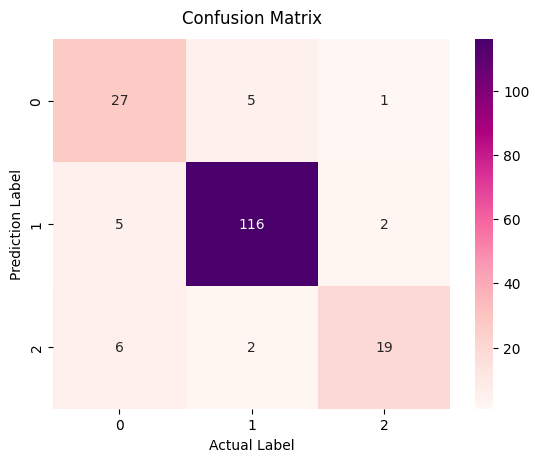

In [ ]:
sns.heatmap(data=confusion_matrix(y_test, clf.predict(x_test)), annot = True, cmap="RdPu",fmt='g')
plt.title('Confusion Matrix', y=1.02)
plt.xlabel('Actual Label')
plt.ylabel('Prediction Label')

Text(50.722222222222214, 0.5, 'Prediction Label')

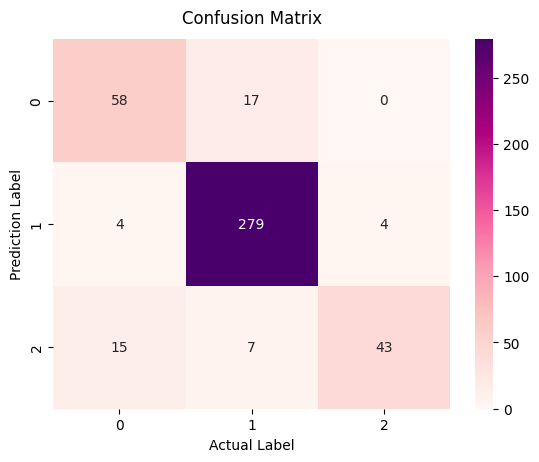

In [ ]:
sns.heatmap(data=confusion_matrix(y_train, clf.predict(x_train)), annot = True, cmap="RdPu",fmt='g')
plt.title('Confusion Matrix', y=1.02)
plt.xlabel('Actual Label')
plt.ylabel('Prediction Label')

Training Accuracy: 88.99297423887587
Testing Accuracy: 88.52459016393442


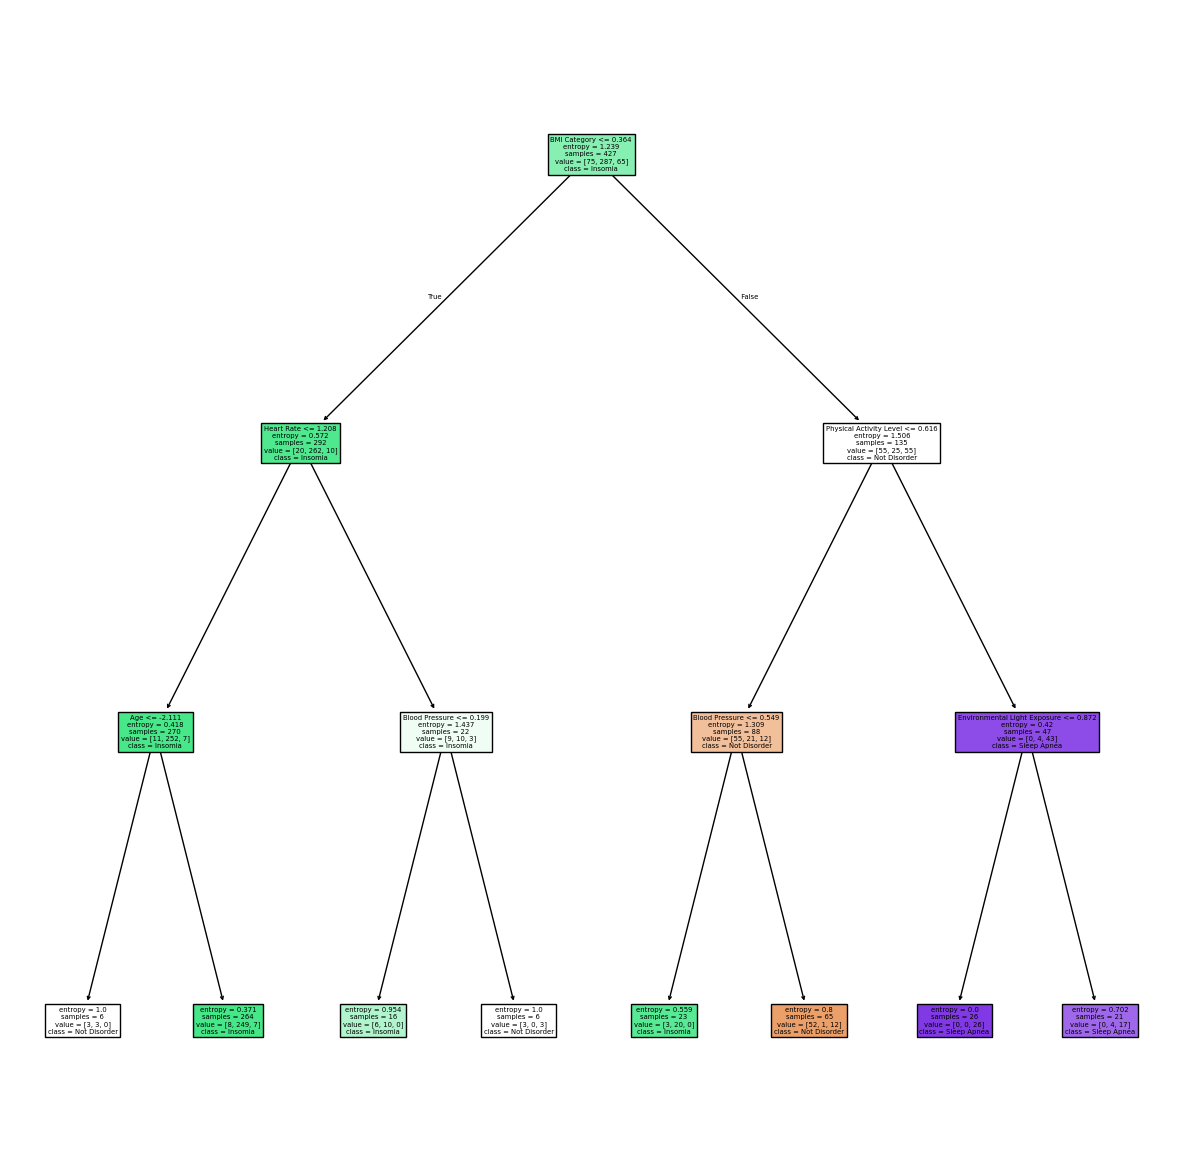

In [ ]:
from sklearn import tree # Importing the 'tree' module from sklearn
from sklearn import metrics # Importing the 'metrics' module from sklearn
model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
model.fit(x_train, y_train)

# Print accuracy
print("Training Accuracy:", metrics.accuracy_score(y_train, model.predict(x_train)) * 100)
print("Testing Accuracy:", metrics.accuracy_score(y_test, model.predict(x_test)) * 100)

# Plot the decision tree
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
tree.plot_tree(model,
               impurity=True,
               class_names=['Not Disorder', 'Insomia','Sleep Apnea'],  # Provide readable class names
               feature_names=X.columns,
               filled=True)
plt.show()


# RANDOM FOREST IMPLEMENTATION
**Hyperparamter in Random Forest is**

1. criterion: The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. (default='gini')
2. max_depth: Max_depth is one of the most important parameters is max_depth. It captures the essence of how deep the tree can get. More depth in the tree means that it is able to extract more information from the features. However, sometimes, excessive depth might be a cause of worry as it tends to bring along overfitting as well.(default = 'None')
3. n_estimators: n_estimators is the parameter used here to predict accuracy, it is the number of trees in the foreset.(default = 100)


**RESULT 1**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 150,criterion='entropy',max_depth = 10)
classifier.fit(x_train, y_train)
rf_pred = classifier.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, rf_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, rf_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,rf_pred)*100
print("Accuracy:",result2)

Confusion Matrix:
[[ 25   5   3]
 [  5 117   1]
 [  1   3  23]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.76      0.78        33
           1       0.94      0.95      0.94       123
           2       0.85      0.85      0.85        27

    accuracy                           0.90       183
   macro avg       0.86      0.85      0.86       183
weighted avg       0.90      0.90      0.90       183

Accuracy: 90.1639344262295


**RESULT 2**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 500,criterion='entropy',max_depth = 8)
classifier.fit(x_train, y_train)
rf_pred = classifier.predict(x_test)


In [ ]:

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, rf_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, rf_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,rf_pred)*100
print("Accuracy:",result2)

Confusion Matrix:
[[ 25   5   3]
 [  5 117   1]
 [  2   3  22]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.76      0.77        33
           1       0.94      0.95      0.94       123
           2       0.85      0.81      0.83        27

    accuracy                           0.90       183
   macro avg       0.85      0.84      0.85       183
weighted avg       0.89      0.90      0.90       183

Accuracy: 89.61748633879782


**RESULT 3**

In [ ]:

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100,criterion='entropy',max_depth = None)
classifier.fit(x_train, y_train)
rf_pred = classifier.predict(x_test)

In [ ]:

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, rf_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, rf_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,rf_pred)*100
print("Accuracy:",result2)

Confusion Matrix:
[[ 25   5   3]
 [  4 117   2]
 [  1   3  23]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        33
           1       0.94      0.95      0.94       123
           2       0.82      0.85      0.84        27

    accuracy                           0.90       183
   macro avg       0.86      0.85      0.86       183
weighted avg       0.90      0.90      0.90       183

Accuracy: 90.1639344262295


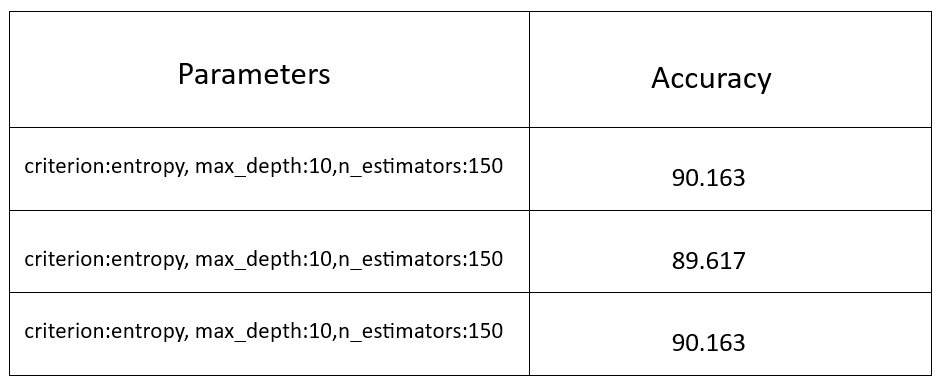

In [ ]:
#MSE
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, rf_pred))

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, rf_pred)))

#MAE
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, rf_pred))

#R2
from sklearn.metrics import r2_score
print(r2_score(y_test,rf_pred))

0.16393442622950818
0.40488816508945796
0.12021857923497267
0.4983552631578947


Text(50.722222222222214, 0.5, 'Prediction Label')

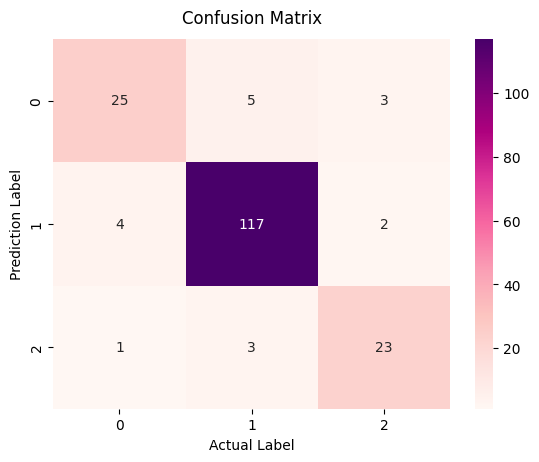

In [ ]:
sns.heatmap(data=confusion_matrix(y_test, classifier.predict(x_test)), annot = True, cmap="RdPu",fmt='g')
plt.title('Confusion Matrix', y=1.02)
plt.xlabel('Actual Label')
plt.ylabel('Prediction Label')

Text(50.722222222222214, 0.5, 'Prediction Label')

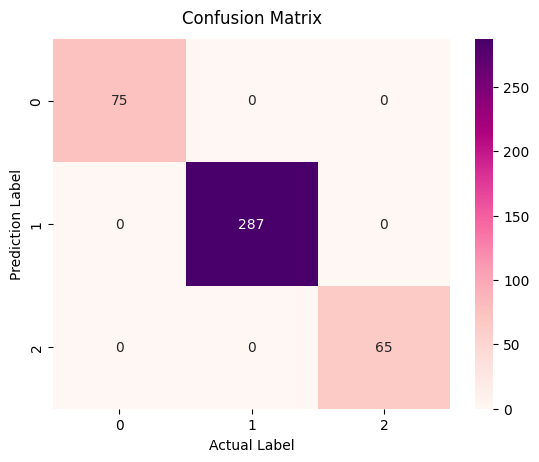

In [ ]:
sns.heatmap(data=confusion_matrix(y_train, classifier.predict(x_train)), annot = True, cmap="RdPu",fmt='g')
plt.title('Confusion Matrix', y=1.02)
plt.xlabel('Actual Label')
plt.ylabel('Prediction Label')

**NAIVE BAIYES IMPLEMENTATION**

In [ ]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
g_pred = gaussian.predict(x_test)
train_acc_gaussian = round(gaussian.score(x_train, y_train) * 100, 2)
test_acc_gaussian = round(gaussian.score(x_test, g_pred) * 100, 2)

In [ ]:
result = confusion_matrix(y_test, g_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, g_pred)
print("Classification Report:",)
print (result1)
print('Train Accuracy:',train_acc_gaussian)
print('Test Accuracy:',test_acc_gaussian)

Confusion Matrix:
[[ 28   4   1]
 [ 11 110   2]
 [  5   2  20]]
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.85      0.73        33
           1       0.95      0.89      0.92       123
           2       0.87      0.74      0.80        27

    accuracy                           0.86       183
   macro avg       0.82      0.83      0.82       183
weighted avg       0.88      0.86      0.87       183

Train Accuracy: 84.07
Test Accuracy: 100.0


Here, we assume that the features follow a normal distribution. Instead of discrete counts, we have continuous features.

In [ ]:
#MSE
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, g_pred))

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, g_pred)))

#MAE
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, g_pred))

#R2
from sklearn.metrics import r2_score
print(r2_score(y_test,g_pred))

0.23497267759562843
0.4847398040141004
0.16939890710382513
0.28097587719298245


# LOGISTIC REGRESSION IMPLEMENTATION
**Hyperparamter in Logistic Regression is**

1. n_jobs: n_jobs specifies the number of CPU cores used for key machine learning tasks.(default:None, Maximum number of iterations taken for the solvers to converge.)
2. max_depth: max_depth: Indicates how deep the tree can be. The deeper the tree, the more splits it has and it captures more information about the data. (Default value is none i.e. nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples)
3. random_state: Random state ensures that the splits that you generate are reproducible. The random state that you provide is used as a seed to the random number generator. This ensures that the random numbers are generated in the same order.(default=None)

In [ ]:
from sklearn.linear_model import LogisticRegression

#Logistic Regression
lr_model = LogisticRegression(max_iter=100,random_state=1, n_jobs=10)
lr_model.fit(x_train, y_train)
lr_pred = lr_model.predict(x_test)
acc_log = round(lr_model.score(x_train, y_train) * 100, 2)
lr = 100*(accuracy_score(y_test, lr_pred))
print("Train Accuracy: " ,acc_log)
print("Test Accuracy: " + str(lr))
result = confusion_matrix(y_test,lr_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, lr_pred)
print("Classification Report:",)
print (result1)

Train Accuracy:  86.42
Test Accuracy: 84.15300546448088
Confusion Matrix:
[[ 21   6   6]
 [  8 113   2]
 [  3   4  20]]
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.64      0.65        33
           1       0.92      0.92      0.92       123
           2       0.71      0.74      0.73        27

    accuracy                           0.84       183
   macro avg       0.76      0.77      0.76       183
weighted avg       0.84      0.84      0.84       183



In [ ]:
#Logistic Regression
lr_model = LogisticRegression(max_iter=120,random_state=0, n_jobs=20)
lr_model.fit(x_train, y_train)
lr_pred = lr_model.predict(x_test)
acc_log = round(lr_model.score(x_train, y_train) * 100, 2)
lr = 100*(accuracy_score(y_test, lr_pred))
print("Train Accuracy: " ,acc_log)
print("Test Accuracy: " + str(lr))
result = confusion_matrix(y_test,lr_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, lr_pred)
print("Classification Report:",)
print (result1)

Train Accuracy:  86.42
Test Accuracy: 84.15300546448088
Confusion Matrix:
[[ 21   6   6]
 [  8 113   2]
 [  3   4  20]]
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.64      0.65        33
           1       0.92      0.92      0.92       123
           2       0.71      0.74      0.73        27

    accuracy                           0.84       183
   macro avg       0.76      0.77      0.76       183
weighted avg       0.84      0.84      0.84       183



In [ ]:
#MSE
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, lr_pred))

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, lr_pred)))

#MAE
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, lr_pred))

#R2
from sklearn.metrics import r2_score
print(r2_score(y_test,lr_pred))

0.30601092896174864
0.5531825457855197
0.20765027322404372
0.0635964912280701


Text(50.722222222222214, 0.5, 'Prediction Label')

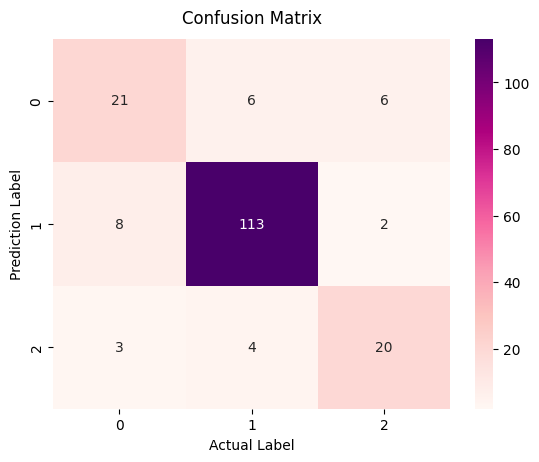

In [ ]:
sns.heatmap(data=confusion_matrix(y_test, lr_model.predict(x_test)), annot = True, cmap="RdPu",fmt='g')
plt.title('Confusion Matrix', y=1.02)
plt.xlabel('Actual Label')
plt.ylabel('Prediction Label')


Text(50.722222222222214, 0.5, 'Prediction Label')

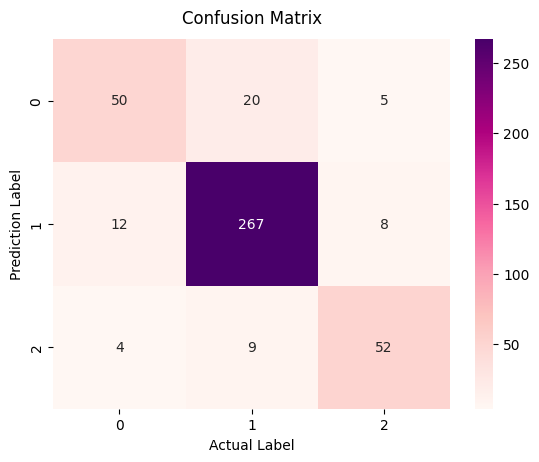

In [ ]:
sns.heatmap(data=confusion_matrix(y_train, lr_model.predict(x_train)), annot = True, cmap="RdPu",fmt='g')
plt.title('Confusion Matrix', y=1.02)
plt.xlabel('Actual Label')
plt.ylabel('Prediction Label')

# STOCHASTIC GRADIENT DESCENT IMPLEMENTATION

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
sgd_pred = sgd.predict(x_test)
acc_sgd = round(sgd.score(x_train, y_train) * 100, 2)
test_acc_sgd = round(sgd.score(x_test, sgd_pred) * 100, 2)
print('Accuracy on training data : ', acc_sgd)
print('Accuracy on test data : ', test_acc_sgd)
result = confusion_matrix(y_test,sgd_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, sgd_pred)
print("Classification Report:",)
print (result1)

Accuracy on training data :  80.33
Accuracy on test data :  100.0
Confusion Matrix:
[[ 21   5   7]
 [ 12 105   6]
 [  1  17   9]]
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.64      0.63        33
           1       0.83      0.85      0.84       123
           2       0.41      0.33      0.37        27

    accuracy                           0.74       183
   macro avg       0.62      0.61      0.61       183
weighted avg       0.73      0.74      0.73       183



In [ ]:
#MSE
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, sgd_pred))

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, sgd_pred)))

#MAE
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, sgd_pred))

#R2
from sklearn.metrics import r2_score
print(r2_score(y_test,sgd_pred))

0.39344262295081966
0.62725004818718
0.30601092896174864
-0.20394736842105265


Text(50.722222222222214, 0.5, 'Prediction Label')

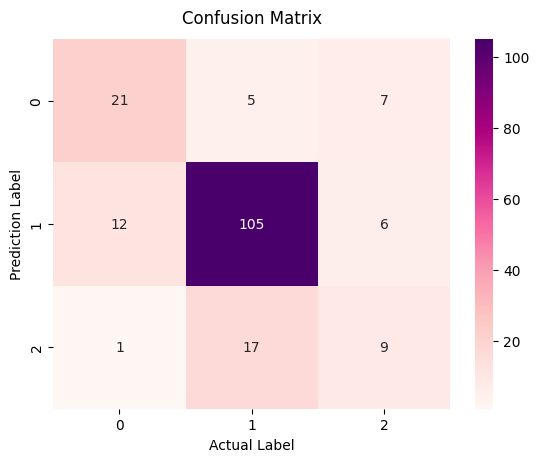

In [ ]:
sns.heatmap(data=confusion_matrix(y_test, sgd.predict(x_test)), annot = True, cmap="RdPu",fmt='g')
plt.title('Confusion Matrix', y=1.02)
plt.xlabel('Actual Label')
plt.ylabel('Prediction Label')

Text(50.722222222222214, 0.5, 'Prediction Label')

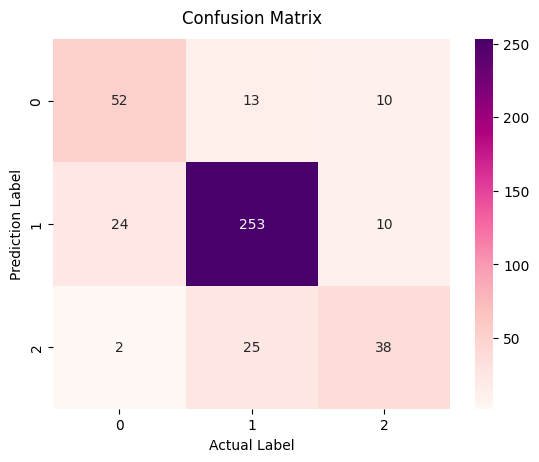

In [ ]:
sns.heatmap(data=confusion_matrix(y_train, sgd.predict(x_train)), annot = True, cmap="RdPu",fmt='g')
plt.title('Confusion Matrix', y=1.02)
plt.xlabel('Actual Label')
plt.ylabel('Prediction Label')

# SVM: SUPPORT VECTOR MACHINE IMPLEMENTATION

In [ ]:
# non-linear data
from sklearn import datasets
circle_X, circle_y = datasets.make_circles(n_samples=300, noise=0.05)

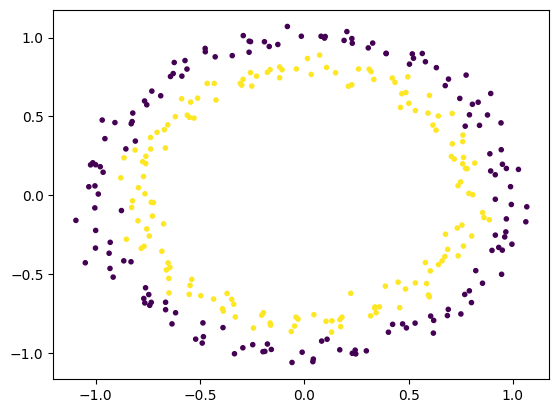

In [ ]:
# show raw non-linear data
plt.scatter(circle_X[:, 0], circle_X[:, 1], c=circle_y, marker='.')
plt.show()



Now that you can see how the data are separated, we can choose a non-linear SVM to start with.

In the code below, we have used kernel='rbf', as here we are creating SVM for non-linear data. Gaussian Radial Basis Function (RBF) One of the most powerful and commonly used kernels in SVMs. Usually the choice for non-linear data.

**Hyperparamter in SVM is**

1. kernel: In the code below, we have used kernel='rbf', as here we are creating SVM for non-linear data. Gaussian Radial Basis Function (RBF)
One of the most powerful and commonly used kernels in SVMs. Usually the choice for non-linear data.
This type of model uses the kernel of the normal (or Gaussian) probability density function (PDF) as the basis function. In this, basis function determines the spacing between the different basis functions that combine to form the model

In [ ]:
from sklearn import svm
classifier1 = svm.SVC(kernel='rbf')

classifier1.fit(x_train,y_train)

x_train_prediction = classifier1.predict(x_train)
training_data_accuray = accuracy_score(x_train_prediction,y_train)* 100

print('Accuracy on training data : ', training_data_accuray)

x_test_prediction = classifier1.predict(x_test)
test_data_accuray = accuracy_score(x_test_prediction,y_test)* 100

print('Accuracy on test data : ', test_data_accuray)

result = confusion_matrix(y_test,x_test_prediction)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, x_test_prediction)
print("Classification Report:",)
print (result1)

Accuracy on training data :  90.63231850117096
Accuracy on test data :  89.07103825136612
Confusion Matrix:
[[ 24   5   4]
 [  4 117   2]
 [  3   2  22]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.73      0.75        33
           1       0.94      0.95      0.95       123
           2       0.79      0.81      0.80        27

    accuracy                           0.89       183
   macro avg       0.83      0.83      0.83       183
weighted avg       0.89      0.89      0.89       183




# XGBOOST
**Hyperparameters in XGBoost:**

1. learning_rate: It’s a regularization parameter. Shrinks feature weights in each boosting step. (Can range from 0-1; increases accuracy when increased)
max_depth: Maximum tree depth. (Can range from 0-infinity; increases accuracy when increased)
2. n_estimators: Number of trees boosted. (Can range from 1-infinity; decreases accuracy when increased; default value = 100)
3. scale_pos_weight: Dealing with imbalanced data. (increases accuracy when increased)


**RESULT 1**

In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(learning_rate=0.001,
                            max_depth =5,
                            n_estimators = 100,
                              scale_pos_weight=2)
xgb_model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:57:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
preds = xgb_model.score(x_train, y_train)
print("Accuracy on traning data : ", preds*100 )
preds1 = xgb_model.score(x_test, y_test)
print("Accuracy on testing data : ", preds1*100 )

Accuracy on traning data :  94.84777517564403
Accuracy on testing data :  88.52459016393442


In [ ]:
xgb_model = xgb.XGBClassifier(learning_rate=0.01,
                            max_depth =20,
                            n_estimators = 80,
                              scale_pos_weight=5)
xgb_model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:58:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=80, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
preds = xgb_model.score(x_train, y_train)
print("Accuracy on traning data : ", preds*100 )
preds1 = xgb_model.score(x_test, y_test)
print("Accuracy on testing data : ", preds1*100 )

Accuracy on traning data :  95.08196721311475
Accuracy on testing data :  88.52459016393442


**RESULT 3**

In [ ]:
xgb_model = xgb.XGBClassifier(learning_rate=0.001,
                            max_depth =5,
                            n_estimators = 100,
                              scale_pos_weight=1)
xgb_model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:58:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
preds = xgb_model.score(x_train, y_train)
print("Accuracy on traning data : ", preds*100 )
preds1 = xgb_model.score(x_test, y_test)
print("Accuracy on testing data : ", preds1*100 )

Accuracy on traning data :  94.84777517564403
Accuracy on testing data :  88.52459016393442


In [ ]:
xgb_pred = xgb_model.predict(x_test)
#MSE
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, xgb_pred))

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, xgb_pred)))

#MAE
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, xgb_pred))

#R2
from sklearn.metrics import r2_score
print(r2_score(y_test, xgb_pred))

0.21311475409836064
0.4616435357484827
0.14754098360655737
0.34786184210526305


Text(50.722222222222214, 0.5, 'Prediction Label')

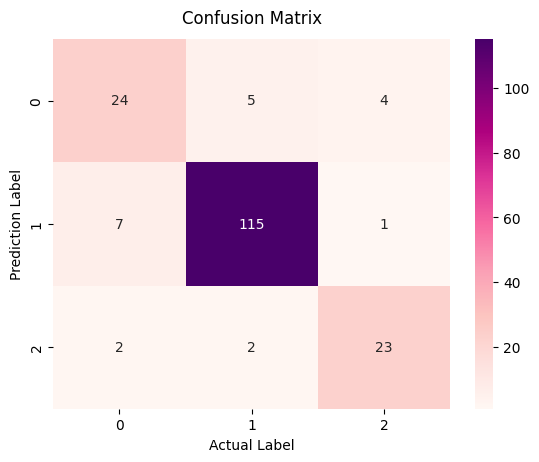

In [ ]:
sns.heatmap(data=confusion_matrix(y_test, xgb_model.predict(x_test)), annot = True, cmap="RdPu",fmt='g')
plt.title('Confusion Matrix', y=1.02)
plt.xlabel('Actual Label')
plt.ylabel('Prediction Label')

Text(50.722222222222214, 0.5, 'Prediction Label')

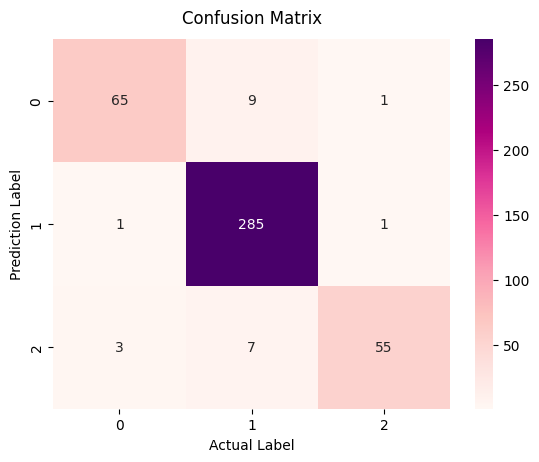

In [ ]:
sns.heatmap(data=confusion_matrix(y_train, xgb_model.predict(x_train)), annot = True, cmap="RdPu",fmt='g')
plt.title('Confusion Matrix', y=1.02)
plt.xlabel('Actual Label')
plt.ylabel('Prediction Label')

# FURTHER EVALUATION

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(classifier, x_train, y_train, cv=3)
confusion_matrix(y_train, predictions)

array([[ 51,  21,   3],
       [  8, 275,   4],
       [  4,   7,  54]])

In [ ]:
from sklearn.metrics import precision_score, recall_score

# Specify 'average' parameter for multiclass classification
print("Precision:", precision_score(y_train, predictions, average='weighted')) # Using 'weighted' average
print("Recall:",recall_score(y_train, predictions, average='weighted')) # Using 'weighted' average

Precision: 0.886964443034259
Recall: 0.8899297423887588


In [ ]:
from sklearn.metrics import f1_score

# Specify 'average' parameter for multiclass classification
f1 = f1_score(y_train, predictions, average='weighted')  # Using 'weighted' average
print("F1 Score:", f1)

F1 Score: 0.8868652018836938


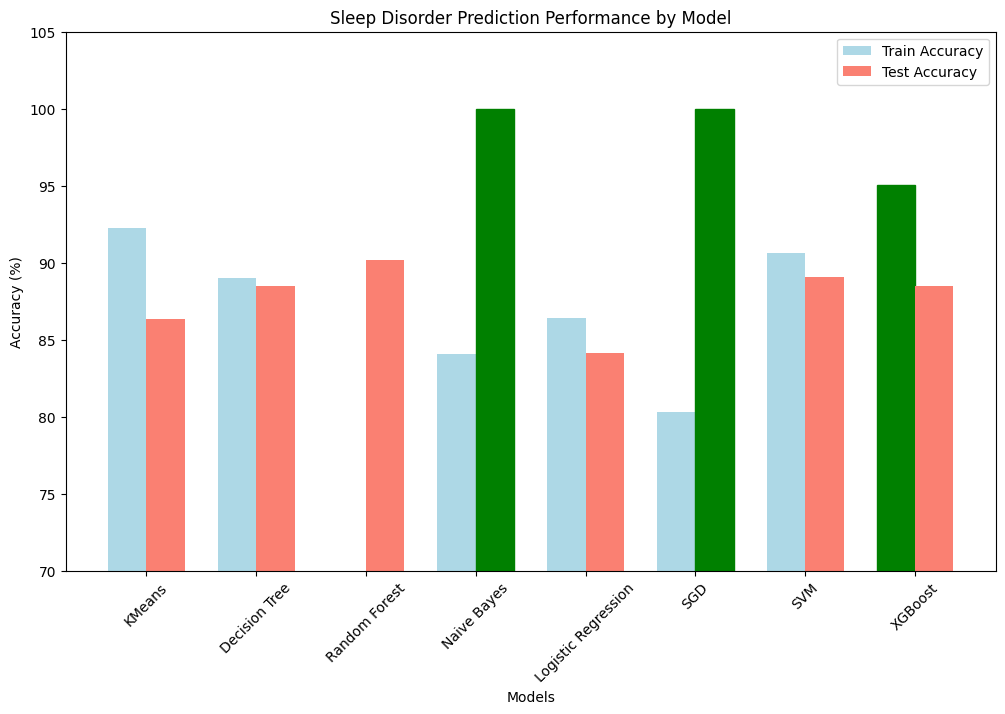

In [ ]:
import numpy as np

# Models and their corresponding train and test accuracies
models = ["KMeans", "Decision Tree", "Random Forest", "Naive Bayes", "Logistic Regression",
          "SGD", "SVM", "XGBoost"]
train_accuracies = [92.27, 88.99, None, 84.07, 86.42, 80.33, 90.63, 95.08]
test_accuracies = [86.34, 88.52, 90.16, 100.0, 84.15, 100.0, 89.07, 88.52]

# Bar chart to represent train and test accuracies
x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 7))
bars1 = ax.bar(x - width/2, [val if val is not None else 0 for val in train_accuracies], width, label='Train Accuracy', color='lightblue')
bars2 = ax.bar(x + width/2, test_accuracies, width, label='Test Accuracy', color='salmon')

# Adding labels, title, and custom x-axis tick labels
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Sleep Disorder Prediction Performance by Model')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45)
ax.legend()

# Highlighting best performing bars
for i, val in enumerate(train_accuracies):
    if val == max([v for v in train_accuracies if v is not None]):
        bars1[i].set_color('green')
for i, val in enumerate(test_accuracies):
    if val == max(test_accuracies):
        bars2[i].set_color('green')

plt.ylim(70, 105)  # Setting y-axis limits to make differences clear

plt.show()


# **Conclusion**

The analysis shows that Random Forest offers the best balance between accuracy and generalization, achieving a high test accuracy of 90.16% without signs of overfitting. Models like XGBoost exhibit potential overfitting, with a significant gap between high training accuracy (95.08%) and lower test accuracy (88.52%). Naive Bayes and SGD, despite their perfect test accuracy (100%), have comparatively low training accuracies, suggesting they may be erratically fitting to the test set rather than generalizing effectively. Therefore, Random Forest is the most reliable model, providing stable performance across training and test datasets, making it the ideal choice for robust and generalizable predictions.